### 1. Testing the development environment

In [1]:
import cv2
import numpy as np
import dlib

# Checking the OpenCV version
print("OpenCV version", cv2.__version__)

# Checking the Numpy version
print("Numpy version", np.__version__)

# Checking the dlib version
print("Dlib version", dlib.__version__)

OpenCV version 3.1.0
Numpy version 1.13.1
Dlib version 19.6.1


### 2. Detecting Faces

Number of faces detected - 1
images/faces/Dyane_Johnson.jpg
Detection 0: Left: 66 Top: 113 Right: 281 Bottom: 328


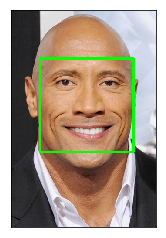

Number of faces detected - 1
images/faces/Emma_Watson.jpg
Detection 0: Left: 732 Top: 237 Right: 1178 Bottom: 683


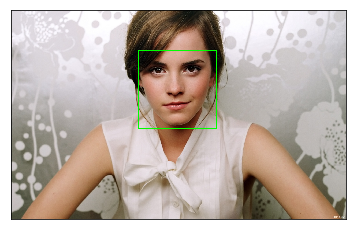

Number of faces detected - 1
images/faces/Enrique_Iglesias.jpg
Detection 0: Left: 189 Top: 134 Right: 314 Bottom: 259


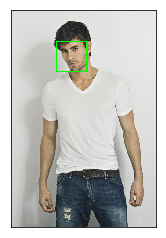

Number of faces detected - 1
images/faces/Justin_Timberlake.jpg
Detection 0: Left: 161 Top: 42 Right: 376 Bottom: 257


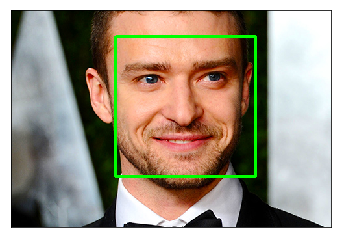

Number of faces detected - 1
images/faces/Katy_Perry.jpg
Detection 0: Left: 520 Top: 90 Right: 735 Bottom: 305


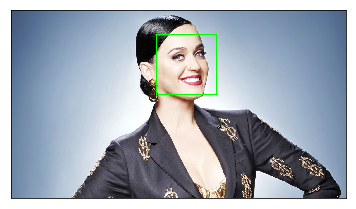

Number of faces detected - 1
images/faces/Shakira.jpg
Detection 0: Left: 452 Top: 194 Right: 710 Bottom: 452


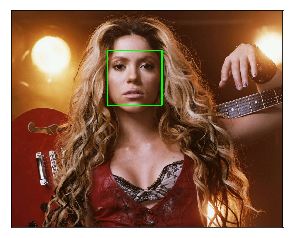

Number of faces detected - 1
images/faces/taylor_swift.jpg
Detection 0: Left: 79 Top: 65 Right: 203 Bottom: 189


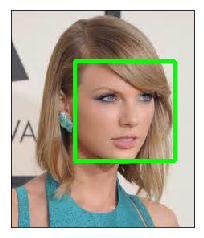

Number of faces detected - 1
images/faces/Will_Smith.jpg
Detection 0: Left: 106 Top: 285 Right: 641 Bottom: 820


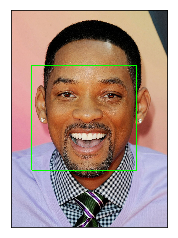

In [60]:
import os
import dlib
import cv2
import numpy as np
import glob
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline 

PATH = os.path.join("images","faces","*.jpg")

def drawBB(image, bound):
    image = image.copy() 
    pt1 = ( bound.left(),bound.top())
    pt2 = ( bound.right(), bound.bottom())
    return cv2.rectangle(image, pt1, pt2, (0,255,0), 3)       

detector = dlib.get_frontal_face_detector()

for image in glob.glob(PATH):
   
    im = mpimg.imread(image)
    
    dets = detector(im)

    print("Number of faces detected - {0}".format(len(dets)))
    print(image)
    for k, d in enumerate(dets):
            print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
                k, d.left(), d.top(), d.right(), d.bottom()))
            im = drawBB(im,d)
    
    plt.imshow(im)
    plt.xticks([]), plt.yticks([])
    plt.show()

### 3.  Detecting Facial Landmarks

Number of faces detected - 1
Detection 0: Left: 161 Top: 42 Right: 376 Bottom: 257


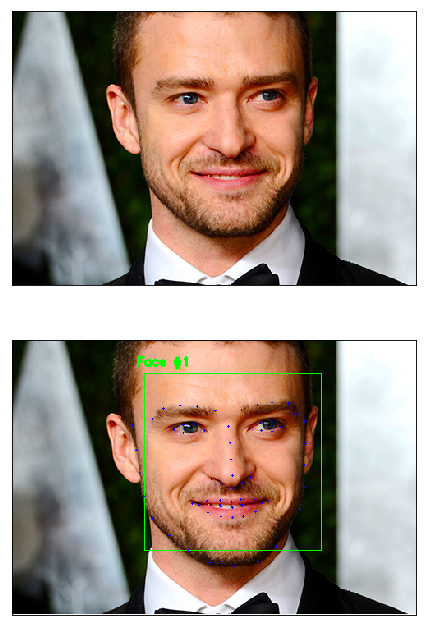

In [61]:
# Using dlib to detect the faces in an image

import cv2
import dlib
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from collections import OrderedDict

%matplotlib inline 

PATH = os.path.join("..","dependencies")
FILE_NAME = "shape_predictor_68_face_landmarks.dat"

IMAGE_PATH = os.path.join("images","faces","Justin_Timberlake.jpg")

predictor = dlib.shape_predictor(os.path.join(PATH,FILE_NAME))

# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 36)),
    ("jaw", (0, 17))
])

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords


def draw_bb(image, bound):
    image = image.copy() 
    
    pt1 = ( bound.left(), bound.top())
    pt2 = ( bound.right(), bound.bottom())    
    
    return cv2.rectangle(image, pt1, pt2, (0,255,0), thickness=1, lineType=8, shift=0)       


detector = dlib.get_frontal_face_detector()

im  =  mpimg.imread(IMAGE_PATH) # this is the input image

oim = im.copy()

dets = detector(im)

print("Number of faces detected - {0}".format(len(dets)))

for k, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        
        im = draw_bb(im,d)
        
        gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)     
        
        shape = predictor(gray, d)
        
        shape = shape_to_np(shape)
        
        # show the face number
        cv2.putText(im, "Face #{}".format(k + 1), (d.left() - 10, d.top() - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        for (x, y) in shape:
                cv2.circle(im, (x, y), 1, (0, 0, 255), -1)
        
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.imshow(oim)
plt.xticks([]), plt.yticks([])


plt.subplot(212)
plt.imshow(im)
plt.xticks([]), plt.yticks([])

plt.show()

### 4.  Recognizing Faces - Celebrities

In [63]:
import os
import dlib
import matplotlib.image as mpimg

# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 36)),
    ("jaw", (0, 17))
])


def face_feature(face_image):
    """
    Given a image, returns a list of the detected faces features using the dlib compute_face_descriptor function
    :param face_image : Image of the face
    :return : List of image features
    """
    
    features = []
    
    KEY = face_image.split("/")[-2] # Change this line according to your file orgnaization
    
    im = mpimg.imread(image)
    
    dets = detector(im)
    
    for k, d in enumerate(dets):
            
            im = draw_bb(im,d)

            gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)     

            sp = predictor(gray, d)

            shape = shape_to_np(sp)

            face_descriptor = facerec.compute_face_descriptor(im, sp)

            features.append(np.array(face_descriptor))
            
    return features

    
def face_distance(face_encodings, face_to_compare):
    """
    Given a list of face encodings, compare them to a known face encoding and get a euclidean distance
    for each comparison face. The distance tells you how similar the faces are.
    :param faces: List of face encodings to compare
    :param face_to_compare: A face encoding to compare against
    :return: A numpy ndarray with the distance for each face in the same order as the 'faces' array
    """
    if len(face_encodings) == 0:
        return np.empty((0))

    return np.linalg.norm(face_encodings - face_to_compare, axis=1)


FACE_DEC_MODEL_PATH = os.path.join("..","dependencies","shape_predictor_68_face_landmarks.dat")
FACE_REC_MODEL_PATH = os.path.join("..","dependencies","dlib_face_recognition_resnet_model_v1 2.dat")
IMAGES_PATH = os.path.join("images","lfw","*","*.jpg")

predictor = dlib.shape_predictor(FACE_DEC_MODEL_PATH)
facerec   = dlib.face_recognition_model_v1(FACE_REC_MODEL_PATH)
detector  = dlib.get_frontal_face_detector()

count = 0

features = []
labels = []

for image in glob.glob(IMAGES_PATH):
    
    KEY = image.split("/")[-2]
    
    print(image)
    
    im = mpimg.imread(image)
    
    dets = detector(im)
    
    for k, d in enumerate(dets):
        
            im = draw_bb(im,d)

            gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)     

            sp = predictor(gray, d)

            shape = shape_to_np(sp)

            face_descriptor = facerec.compute_face_descriptor(im, sp)

            features.append(np.array(face_descriptor))
            
            labels.append(KEY)
        
            count+=1


print("Total Faces Indexed", count)

images/lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
images/lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg
images/lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg
images/lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg
images/lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg
images/lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg
images/lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg
images/lfw/Aaron_Pena/Aaron_Pena_0001.jpg
images/lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
images/lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg
images/lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg
images/lfw/Abba_Eban/Abba_Eban_0001.jpg
images/lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg
images/lfw/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-Hakim_0001.jpg
images/lfw/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg
images/lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg
images/lfw/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0002.jpg
images/lfw/Abdoulaye_Wade/Abdoulaye_Wade_0001.jpg
images/lfw/Abdoulaye_Wade/Abdoulaye_Wade_0002.jpg
images/lfw/Abdoulaye_Wade/Abdoulaye_Wade_0003.jpg
im

images/lfw/Al_Pacino/Al_Pacino_0002.jpg
images/lfw/Al_Pacino/Al_Pacino_0003.jpg
images/lfw/Al_Sharpton/Al_Sharpton_0001.jpg
images/lfw/Al_Sharpton/Al_Sharpton_0002.jpg
images/lfw/Al_Sharpton/Al_Sharpton_0003.jpg
images/lfw/Al_Sharpton/Al_Sharpton_0004.jpg
images/lfw/Al_Sharpton/Al_Sharpton_0005.jpg
images/lfw/Al_Sharpton/Al_Sharpton_0006.jpg
images/lfw/Al_Sharpton/Al_Sharpton_0007.jpg
images/lfw/Alain_Cervantes/Alain_Cervantes_0001.jpg
images/lfw/Alain_Ducasse/Alain_Ducasse_0001.jpg
images/lfw/Alan_Ball/Alan_Ball_0001.jpg
images/lfw/Alan_Ball/Alan_Ball_0002.jpg
images/lfw/Alan_Dershowitz/Alan_Dershowitz_0001.jpg
images/lfw/Alan_Dreher/Alan_Dreher_0001.jpg
images/lfw/Alan_Greenspan/Alan_Greenspan_0001.jpg
images/lfw/Alan_Greenspan/Alan_Greenspan_0002.jpg
images/lfw/Alan_Greenspan/Alan_Greenspan_0003.jpg
images/lfw/Alan_Greenspan/Alan_Greenspan_0004.jpg
images/lfw/Alan_Greenspan/Alan_Greenspan_0005.jpg
images/lfw/Alan_Greer/Alan_Greer_0001.jpg
images/lfw/Alan_Jackson/Alan_Jackson_0001.jp

images/lfw/Alexandra_Vodjanikova/Alexandra_Vodjanikova_0002.jpg
images/lfw/Alexandre_Daigle/Alexandre_Daigle_0001.jpg
images/lfw/Alexandre_Despatie/Alexandre_Despatie_0001.jpg
images/lfw/Alexandre_Herchcovitch/Alexandre_Herchcovitch_0001.jpg
images/lfw/Alexandre_Vinokourov/Alexandre_Vinokourov_0001.jpg
images/lfw/Alexis_Bledel/Alexis_Bledel_0001.jpg
images/lfw/Alexis_Dennisoff/Alexis_Dennisoff_0001.jpg
images/lfw/Alfonso_Cuaron/Alfonso_Cuaron_0001.jpg
images/lfw/Alfonso_Portillo/Alfonso_Portillo_0001.jpg
images/lfw/Alfonso_Soriano/Alfonso_Soriano_0001.jpg
images/lfw/Alfred_Ford/Alfred_Ford_0001.jpg
images/lfw/Alfred_Sant/Alfred_Sant_0001.jpg
images/lfw/Alfredo_di_Stefano/Alfredo_di_Stefano_0001.jpg
images/lfw/Alfredo_Moreno/Alfredo_Moreno_0001.jpg
images/lfw/Alfredo_Pena/Alfredo_Pena_0001.jpg
images/lfw/Ali_Abbas/Ali_Abbas_0001.jpg
images/lfw/Ali_Abbas/Ali_Abbas_0002.jpg
images/lfw/Ali_Abdullah_Saleh/Ali_Abdullah_Saleh_0001.jpg
images/lfw/Ali_Adbul_Karim_Madani/Ali_Adbul_Karim_Madani_0

images/lfw/Amy_Redford/Amy_Redford_0001.jpg
images/lfw/Amy_Smart/Amy_Smart_0001.jpg
images/lfw/Amy_Yasbeck/Amy_Yasbeck_0001.jpg
images/lfw/Ana_Claudia_Talancon/Ana_Claudia_Talancon_0001.jpg
images/lfw/Ana_Guevara/Ana_Guevara_0001.jpg
images/lfw/Ana_Guevara/Ana_Guevara_0002.jpg
images/lfw/Ana_Guevara/Ana_Guevara_0003.jpg
images/lfw/Ana_Guevara/Ana_Guevara_0004.jpg
images/lfw/Ana_Guevara/Ana_Guevara_0005.jpg
images/lfw/Ana_Guevara/Ana_Guevara_0006.jpg
images/lfw/Ana_Guevara/Ana_Guevara_0007.jpg
images/lfw/Ana_Isabel_Sanchez/Ana_Isabel_Sanchez_0001.jpg
images/lfw/Ana_Palacio/Ana_Palacio_0001.jpg
images/lfw/Ana_Palacio/Ana_Palacio_0002.jpg
images/lfw/Ana_Palacio/Ana_Palacio_0003.jpg
images/lfw/Ana_Palacio/Ana_Palacio_0004.jpg
images/lfw/Ana_Palacio/Ana_Palacio_0005.jpg
images/lfw/Ana_Palacio/Ana_Palacio_0006.jpg
images/lfw/Ana_Palacio/Ana_Palacio_0007.jpg
images/lfw/Ana_Palacio/Ana_Palacio_0008.jpg
images/lfw/Ana_Paula_Gerard/Ana_Paula_Gerard_0001.jpg
images/lfw/Ana_Sebastiao/Ana_Sebastiao

images/lfw/Angelina_Jolie/Angelina_Jolie_0014.jpg
images/lfw/Angelina_Jolie/Angelina_Jolie_0015.jpg
images/lfw/Angelina_Jolie/Angelina_Jolie_0016.jpg
images/lfw/Angelina_Jolie/Angelina_Jolie_0017.jpg
images/lfw/Angelina_Jolie/Angelina_Jolie_0018.jpg
images/lfw/Angelina_Jolie/Angelina_Jolie_0019.jpg
images/lfw/Angelina_Jolie/Angelina_Jolie_0020.jpg
images/lfw/Angelo_Genova/Angelo_Genova_0001.jpg
images/lfw/Angelo_Reyes/Angelo_Reyes_0001.jpg
images/lfw/Angelo_Reyes/Angelo_Reyes_0002.jpg
images/lfw/Angelo_Reyes/Angelo_Reyes_0003.jpg
images/lfw/Angelo_Reyes/Angelo_Reyes_0004.jpg
images/lfw/Angie_Arzola/Angie_Arzola_0001.jpg
images/lfw/Angie_Martinez/Angie_Martinez_0001.jpg
images/lfw/Anibal_Ibarra/Anibal_Ibarra_0001.jpg
images/lfw/Anibal_Ibarra/Anibal_Ibarra_0002.jpg
images/lfw/Anibal_Ibarra/Anibal_Ibarra_0003.jpg
images/lfw/Anil_Ramsook/Anil_Ramsook_0001.jpg
images/lfw/Anita_DeFrantz/Anita_DeFrantz_0001.jpg
images/lfw/Anja_Paerson/Anja_Paerson_0001.jpg
images/lfw/Anjum_Hussain/Anjum_Hussa

images/lfw/Ariel_Sharon/Ariel_Sharon_0023.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0024.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0025.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0026.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0027.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0028.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0029.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0030.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0031.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0032.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0033.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0034.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0035.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0036.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0037.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0038.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0039.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0040.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0041.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0042.jpg
images/lfw/Ariel_Sharon/Ariel_Sharon_0043.jpg
images/lfw/Ariel_Sharon/Ariel_Shar

images/lfw/Asif_Hanif/Asif_Hanif_0001.jpg
images/lfw/Askar_Akayev/Askar_Akayev_0001.jpg
images/lfw/Asmaa_Assad/Asmaa_Assad_0001.jpg
images/lfw/Assad_Ahmadi/Assad_Ahmadi_0001.jpg
images/lfw/Astou_Ndiaye-Diatta/Astou_Ndiaye-Diatta_0001.jpg
images/lfw/Astrid_Betancourt/Astrid_Betancourt_0001.jpg
images/lfw/Astrid_Eyzaguirre/Astrid_Eyzaguirre_0001.jpg
images/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0001.jpg
images/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0002.jpg
images/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0003.jpg
images/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0004.jpg
images/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0005.jpg
images/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0006.jpg
images/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0007.jpg
images/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0008.jpg
images/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0009.jpg
images/lfw/Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0010.jpg
images/lfw/Atal_Bihari_Vajpaye

images/lfw/Bernard_Law/Bernard_Law_0004.jpg
images/lfw/Bernard_Law/Bernard_Law_0005.jpg
images/lfw/Bernard_Lord/Bernard_Lord_0001.jpg
images/lfw/Bernard_Lord/Bernard_Lord_0002.jpg
images/lfw/Bernard_Siegel/Bernard_Siegel_0001.jpg
images/lfw/Bernardo_Segura/Bernardo_Segura_0001.jpg
images/lfw/Bernardo_Segura/Bernardo_Segura_0002.jpg
images/lfw/Bernice_Wong/Bernice_Wong_0001.jpg
images/lfw/Bertie_Ahern/Bertie_Ahern_0001.jpg
images/lfw/Bertie_Ahern/Bertie_Ahern_0002.jpg
images/lfw/Bertie_Ahern/Bertie_Ahern_0003.jpg
images/lfw/Bertie_Ahern/Bertie_Ahern_0004.jpg
images/lfw/Bertie_Ahern/Bertie_Ahern_0005.jpg
images/lfw/Bertrand_Bonello/Bertrand_Bonello_0001.jpg
images/lfw/Bertrand_Bonello/Bertrand_Bonello_0002.jpg
images/lfw/Bertrand_Delanoe/Bertrand_Delanoe_0001.jpg
images/lfw/Beth_Blough/Beth_Blough_0001.jpg
images/lfw/Beth_Jones/Beth_Jones_0001.jpg
images/lfw/Beth_Jones/Beth_Jones_0002.jpg
images/lfw/Betsy_Coffin/Betsy_Coffin_0001.jpg
images/lfw/Betsy_Smith/Betsy_Smith_0001.jpg
images/lfw

images/lfw/Billy_Edelin/Billy_Edelin_0001.jpg
images/lfw/Billy_Gilman/Billy_Gilman_0001.jpg
images/lfw/Billy_Graham/Billy_Graham_0001.jpg
images/lfw/Billy_Graham/Billy_Graham_0002.jpg
images/lfw/Billy_Joel/Billy_Joel_0001.jpg
images/lfw/Billy_Rork/Billy_Rork_0001.jpg
images/lfw/Billy_Sollie/Billy_Sollie_0001.jpg
images/lfw/Billy_Sollie/Billy_Sollie_0002.jpg
images/lfw/Billy_Tibbets/Billy_Tibbets_0001.jpg
images/lfw/Bing_Crosby/Bing_Crosby_0001.jpg
images/lfw/Binyamin_Ben-Eliezer/Binyamin_Ben-Eliezer_0001.jpg
images/lfw/Binyamin_Ben-Eliezer/Binyamin_Ben-Eliezer_0002.jpg
images/lfw/Binyamin_Ben-Eliezer/Binyamin_Ben-Eliezer_0003.jpg
images/lfw/Binyamin_Ben-Eliezer/Binyamin_Ben-Eliezer_0004.jpg
images/lfw/Binyamin_Ben-Eliezer/Binyamin_Ben-Eliezer_0005.jpg
images/lfw/Binyamin_Ben-Eliezer/Binyamin_Ben-Eliezer_0006.jpg
images/lfw/Binyamin_Ben-Eliezer/Binyamin_Ben-Eliezer_0007.jpg
images/lfw/Bison_Dele/Bison_Dele_0001.jpg
images/lfw/Bixente_LIzarazu/Bixente_LIzarazu_0001.jpg
images/lfw/BJ_Habi

images/lfw/Brian_Jordan/Brian_Jordan_0001.jpg
images/lfw/Brian_Kerr/Brian_Kerr_0001.jpg
images/lfw/Brian_Lara/Brian_Lara_0001.jpg
images/lfw/Brian_McIntyre/Brian_McIntyre_0001.jpg
images/lfw/Brian_Meadors/Brian_Meadors_0001.jpg
images/lfw/Brian_Mulroney/Brian_Mulroney_0001.jpg
images/lfw/Brian_Mulroney/Brian_Mulroney_0002.jpg
images/lfw/Brian_Olson/Brian_Olson_0001.jpg
images/lfw/Brian_Pavlich/Brian_Pavlich_0001.jpg
images/lfw/Brian_Scalabrine/Brian_Scalabrine_0001.jpg
images/lfw/Brian_Schneider/Brian_Schneider_0001.jpg
images/lfw/Brian_StPierre/Brian_StPierre_0001.jpg
images/lfw/Brian_Van_Dusen/Brian_Van_Dusen_0001.jpg
images/lfw/Brian_Weaver/Brian_Weaver_0001.jpg
images/lfw/Brian_Wells/Brian_Wells_0001.jpg
images/lfw/Brian_Wells/Brian_Wells_0002.jpg
images/lfw/Brian_Williams/Brian_Williams_0001.jpg
images/lfw/Bridget_Fonda/Bridget_Fonda_0001.jpg
images/lfw/Bridget_Fonda/Bridget_Fonda_0002.jpg
images/lfw/Bridget_Fonda/Bridget_Fonda_0003.jpg
images/lfw/Bridgette_Wilson-Sampras/Bridgett

images/lfw/Carlos_Menem/Carlos_Menem_0006.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0007.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0008.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0009.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0010.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0011.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0012.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0013.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0014.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0015.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0016.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0017.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0018.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0019.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0020.jpg
images/lfw/Carlos_Menem/Carlos_Menem_0021.jpg
images/lfw/Carlos_Mesa/Carlos_Mesa_0001.jpg
images/lfw/Carlos_Mesa/Carlos_Mesa_0002.jpg
images/lfw/Carlos_Moya/Carlos_Moya_0001.jpg
images/lfw/Carlos_Moya/Carlos_Moya_0002.jpg
images/lfw/Carlos_Moya/Carlos_Moya_0003.jpg
images/lfw/Carlos_Moya/Carlos_Moya_0004.jpg


images/lfw/Cha_Yung-gu/Cha_Yung-gu_0001.jpg
images/lfw/Chadha_Gurinder/Chadha_Gurinder_0001.jpg
images/lfw/Chakib_Khelil/Chakib_Khelil_0001.jpg
images/lfw/Chakib_Khelil/Chakib_Khelil_0002.jpg
images/lfw/Chan_Choi/Chan_Choi_0001.jpg
images/lfw/Chan_Gailey/Chan_Gailey_0001.jpg
images/lfw/Chan_Gailey/Chan_Gailey_0002.jpg
images/lfw/Chan_Gailey/Chan_Gailey_0003.jpg
images/lfw/Chan_Ho_Park/Chan_Ho_Park_0001.jpg
images/lfw/Chance_Mock/Chance_Mock_0001.jpg
images/lfw/Chanda_Rubin/Chanda_Rubin_0001.jpg
images/lfw/Chanda_Rubin/Chanda_Rubin_0002.jpg
images/lfw/Chanda_Rubin/Chanda_Rubin_0003.jpg
images/lfw/Chanda_Rubin/Chanda_Rubin_0004.jpg
images/lfw/Chanda_Rubin/Chanda_Rubin_0005.jpg
images/lfw/Chandrika_Kumaratunga/Chandrika_Kumaratunga_0001.jpg
images/lfw/Chang_Dae-whan/Chang_Dae-whan_0001.jpg
images/lfw/Chang_Dae-whan/Chang_Dae-whan_0002.jpg
images/lfw/Chang_Jae_On/Chang_Jae_On_0001.jpg
images/lfw/Chang_Saio-yue/Chang_Saio-yue_0001.jpg
images/lfw/Chang_Sang/Chang_Sang_0001.jpg
images/lfw/Cha

images/lfw/Christian_Bale/Christian_Bale_0001.jpg
images/lfw/Christian_Fittipaldi/Christian_Fittipaldi_0001.jpg
images/lfw/Christian_Fittipaldi/Christian_Fittipaldi_0002.jpg
images/lfw/Christian_Gimenez/Christian_Gimenez_0001.jpg
images/lfw/Christian_Lacroix/Christian_Lacroix_0001.jpg
images/lfw/Christian_Lirette/Christian_Lirette_0001.jpg
images/lfw/Christian_Longo/Christian_Longo_0001.jpg
images/lfw/Christian_Longo/Christian_Longo_0002.jpg
images/lfw/Christian_Longo/Christian_Longo_0003.jpg
images/lfw/Christian_Malcolm/Christian_Malcolm_0001.jpg
images/lfw/Christian_Olsson/Christian_Olsson_0001.jpg
images/lfw/Christian_Patino/Christian_Patino_0001.jpg
images/lfw/Christian_Von_Wernich/Christian_Von_Wernich_0001.jpg
images/lfw/Christian_Wulff/Christian_Wulff_0001.jpg
images/lfw/Christian_Wulff/Christian_Wulff_0002.jpg
images/lfw/Christiane_Wulff/Christiane_Wulff_0001.jpg
images/lfw/Christina_Aguilera/Christina_Aguilera_0001.jpg
images/lfw/Christina_Aguilera/Christina_Aguilera_0002.jpg


images/lfw/Colin_Jackson/Colin_Jackson_0001.jpg
images/lfw/Colin_Jackson/Colin_Jackson_0002.jpg
images/lfw/Colin_Montgomerie/Colin_Montgomerie_0001.jpg
images/lfw/Colin_Montgomerie/Colin_Montgomerie_0002.jpg
images/lfw/Colin_Montgomerie/Colin_Montgomerie_0003.jpg
images/lfw/Colin_Montgomerie/Colin_Montgomerie_0004.jpg
images/lfw/Colin_Montgomerie/Colin_Montgomerie_0005.jpg
images/lfw/Colin_Phillips/Colin_Phillips_0001.jpg
images/lfw/Colin_Powell/Colin_Powell_0001.jpg
images/lfw/Colin_Powell/Colin_Powell_0002.jpg
images/lfw/Colin_Powell/Colin_Powell_0003.jpg
images/lfw/Colin_Powell/Colin_Powell_0004.jpg
images/lfw/Colin_Powell/Colin_Powell_0005.jpg
images/lfw/Colin_Powell/Colin_Powell_0006.jpg
images/lfw/Colin_Powell/Colin_Powell_0007.jpg
images/lfw/Colin_Powell/Colin_Powell_0008.jpg
images/lfw/Colin_Powell/Colin_Powell_0009.jpg
images/lfw/Colin_Powell/Colin_Powell_0010.jpg
images/lfw/Colin_Powell/Colin_Powell_0011.jpg
images/lfw/Colin_Powell/Colin_Powell_0012.jpg
images/lfw/Colin_Powel

images/lfw/Colin_Powell/Colin_Powell_0171.jpg
images/lfw/Colin_Powell/Colin_Powell_0172.jpg
images/lfw/Colin_Powell/Colin_Powell_0173.jpg
images/lfw/Colin_Powell/Colin_Powell_0174.jpg
images/lfw/Colin_Powell/Colin_Powell_0175.jpg
images/lfw/Colin_Powell/Colin_Powell_0176.jpg
images/lfw/Colin_Powell/Colin_Powell_0177.jpg
images/lfw/Colin_Powell/Colin_Powell_0178.jpg
images/lfw/Colin_Powell/Colin_Powell_0179.jpg
images/lfw/Colin_Powell/Colin_Powell_0180.jpg
images/lfw/Colin_Powell/Colin_Powell_0181.jpg
images/lfw/Colin_Powell/Colin_Powell_0182.jpg
images/lfw/Colin_Powell/Colin_Powell_0183.jpg
images/lfw/Colin_Powell/Colin_Powell_0184.jpg
images/lfw/Colin_Powell/Colin_Powell_0185.jpg
images/lfw/Colin_Powell/Colin_Powell_0186.jpg
images/lfw/Colin_Powell/Colin_Powell_0187.jpg
images/lfw/Colin_Powell/Colin_Powell_0188.jpg
images/lfw/Colin_Powell/Colin_Powell_0189.jpg
images/lfw/Colin_Powell/Colin_Powell_0190.jpg
images/lfw/Colin_Powell/Colin_Powell_0191.jpg
images/lfw/Colin_Powell/Colin_Powe

images/lfw/Damarius_Bilbo/Damarius_Bilbo_0001.jpg
images/lfw/Damon_Dash/Damon_Dash_0001.jpg
images/lfw/Damon_Stoudamire/Damon_Stoudamire_0001.jpg
images/lfw/Damon_van_Dam/Damon_van_Dam_0001.jpg
images/lfw/Damon_van_Dam/Damon_van_Dam_0002.jpg
images/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg
images/lfw/Dan_Bartlett/Dan_Bartlett_0001.jpg
images/lfw/Dan_Boyle/Dan_Boyle_0001.jpg
images/lfw/Dan_Bylsma/Dan_Bylsma_0001.jpg
images/lfw/Dan_Dickau/Dan_Dickau_0001.jpg
images/lfw/Dan_Duquette/Dan_Duquette_0001.jpg
images/lfw/Dan_Guerrero/Dan_Guerrero_0001.jpg
images/lfw/Dan_Kellner/Dan_Kellner_0001.jpg
images/lfw/Dan_LaCoutre/Dan_LaCoutre_0001.jpg
images/lfw/Dan_Monson/Dan_Monson_0001.jpg
images/lfw/Dan_Morales/Dan_Morales_0001.jpg
images/lfw/Dan_Morales/Dan_Morales_0002.jpg
images/lfw/Dan_Morales/Dan_Morales_0003.jpg
images/lfw/Dan_Prinster/Dan_Prinster_0001.jpg
images/lfw/Dan_Quayle/Dan_Quayle_0001.jpg
images/lfw/Dan_Reeves/Dan_Reeves_0001.jpg
images/lfw/Dan_Snyder/Dan_Snyder_0001.jpg
images/lfw/Dan_W

images/lfw/David_Dorfman/David_Dorfman_0001.jpg
images/lfw/David_Duke/David_Duke_0001.jpg
images/lfw/David_Duval/David_Duval_0001.jpg
images/lfw/David_Eldon/David_Eldon_0001.jpg
images/lfw/David_Gest/David_Gest_0001.jpg
images/lfw/David_Glenn/David_Glenn_0001.jpg
images/lfw/David_Hannay/David_Hannay_0001.jpg
images/lfw/David_Hanson/David_Hanson_0001.jpg
images/lfw/David_Hasselhoff/David_Hasselhoff_0001.jpg
images/lfw/David_Heyman/David_Heyman_0001.jpg
images/lfw/David_Heyman/David_Heyman_0002.jpg
images/lfw/David_Heymann/David_Heymann_0001.jpg
images/lfw/David_Heymann/David_Heymann_0002.jpg
images/lfw/David_Heymann/David_Heymann_0003.jpg
images/lfw/David_Heymann/David_Heymann_0004.jpg
images/lfw/David_Heymann/David_Heymann_0005.jpg
images/lfw/David_Hilt/David_Hilt_0001.jpg
images/lfw/David_Ho/David_Ho_0001.jpg
images/lfw/David_Howard/David_Howard_0001.jpg
images/lfw/David_Hyde_Pierce/David_Hyde_Pierce_0001.jpg
images/lfw/David_Hyde_Pierce/David_Hyde_Pierce_0002.jpg
images/lfw/David_Hyd

images/lfw/Derrick_Taylor/Derrick_Taylor_0001.jpg
images/lfw/Des_Brown/Des_Brown_0001.jpg
images/lfw/Desiree_Lemosi/Desiree_Lemosi_0001.jpg
images/lfw/Desiree_Lemosi/Desiree_Lemosi_0002.jpg
images/lfw/Desiree_McKenzie/Desiree_McKenzie_0001.jpg
images/lfw/Desmon_Farmer/Desmon_Farmer_0001.jpg
images/lfw/Devin_Harris/Devin_Harris_0001.jpg
images/lfw/Dewayne_White/Dewayne_White_0001.jpg
images/lfw/Dexter_Jackson/Dexter_Jackson_0001.jpg
images/lfw/Dexter_Jackson/Dexter_Jackson_0002.jpg
images/lfw/Diana_Krall/Diana_Krall_0001.jpg
images/lfw/Diana_Krall/Diana_Krall_0002.jpg
images/lfw/Diana_Krall/Diana_Krall_0003.jpg
images/lfw/Diana_Krall/Diana_Krall_0004.jpg
images/lfw/Diana_Krall/Diana_Krall_0005.jpg
images/lfw/Diana_Krall/Diana_Krall_0006.jpg
images/lfw/Diana_Munz/Diana_Munz_0001.jpg
images/lfw/Diana_Munz/Diana_Munz_0002.jpg
images/lfw/Diana_Munz/Diana_Munz_0003.jpg
images/lfw/Diana_Renee_Valdivieso_Dubon/Diana_Renee_Valdivieso_Dubon_0001.jpg
images/lfw/Diana_Ross/Diana_Ross_0001.jpg
imag

images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0030.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0031.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0032.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0033.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0034.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0035.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0036.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0037.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0038.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0039.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0040.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0041.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0042.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0043.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0044.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0045.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0046.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0047.jpg
images/lfw/Donald_Rumsfeld/Donald_Rumsfeld_0048.jpg
images/lfw/D

images/lfw/Ed_Mekertichian/Ed_Mekertichian_0001.jpg
images/lfw/Ed_Rendell/Ed_Rendell_0001.jpg
images/lfw/Ed_Rosenthal/Ed_Rosenthal_0001.jpg
images/lfw/Ed_Rosenthal/Ed_Rosenthal_0002.jpg
images/lfw/Ed_Rosenthal/Ed_Rosenthal_0003.jpg
images/lfw/Ed_Smart/Ed_Smart_0001.jpg
images/lfw/Ed_Smart/Ed_Smart_0002.jpg
images/lfw/Ed_Smart/Ed_Smart_0003.jpg
images/lfw/Ed_Sullivan/Ed_Sullivan_0001.jpg
images/lfw/Ed_Wade/Ed_Wade_0001.jpg
images/lfw/Eddie_Compass/Eddie_Compass_0001.jpg
images/lfw/Eddie_Fenech_Adami/Eddie_Fenech_Adami_0001.jpg
images/lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
images/lfw/Eddie_Lewis/Eddie_Lewis_0001.jpg
images/lfw/Eddie_Lucio/Eddie_Lucio_0001.jpg
images/lfw/Eddie_Murray/Eddie_Murray_0001.jpg
images/lfw/Eddie_Sutton/Eddie_Sutton_0001.jpg
images/lfw/Eddie_Sutton/Eddie_Sutton_0002.jpg
images/lfw/Eddy_Hartenstein/Eddy_Hartenstein_0001.jpg
images/lfw/Eddy_Merckx/Eddy_Merckx_0001.jpg
images/lfw/Eddy_Merckx/Eddy_Merckx_0002.jpg
images/lfw/Edgar_Savisaar/Edgar_Savisaar_0001.jpg
imag

images/lfw/Ellen_DeGeneres/Ellen_DeGeneres_0002.jpg
images/lfw/Ellen_Engleman/Ellen_Engleman_0001.jpg
images/lfw/Ellen_Engleman/Ellen_Engleman_0002.jpg
images/lfw/Ellen_MacArthur/Ellen_MacArthur_0001.jpg
images/lfw/Ellen_Martin/Ellen_Martin_0001.jpg
images/lfw/Ellen_Pompeo/Ellen_Pompeo_0001.jpg
images/lfw/Ellen_Saracini/Ellen_Saracini_0001.jpg
images/lfw/Elliott_Mincberg/Elliott_Mincberg_0001.jpg
images/lfw/Elmar_Brok/Elmar_Brok_0001.jpg
images/lfw/Elodie_Bouchez/Elodie_Bouchez_0001.jpg
images/lfw/Eloy_Gutierrez/Eloy_Gutierrez_0001.jpg
images/lfw/Elsa_Zylberstein/Elsa_Zylberstein_0001.jpg
images/lfw/Elsa_Zylberstein/Elsa_Zylberstein_0002.jpg
images/lfw/Elsa_Zylberstein/Elsa_Zylberstein_0003.jpg
images/lfw/Elsa_Zylberstein/Elsa_Zylberstein_0004.jpg
images/lfw/Elsa_Zylberstein/Elsa_Zylberstein_0005.jpg
images/lfw/Elsa_Zylberstein/Elsa_Zylberstein_0006.jpg
images/lfw/Elton_John/Elton_John_0001.jpg
images/lfw/Elton_John/Elton_John_0002.jpg
images/lfw/Elton_John/Elton_John_0003.jpg
images/l

images/lfw/Evgeni_Plushenko/Evgeni_Plushenko_0001.jpg
images/lfw/Evie_Lazarou/Evie_Lazarou_0001.jpg
images/lfw/Evo_Morales/Evo_Morales_0001.jpg
images/lfw/Ewan_McGregor/Ewan_McGregor_0001.jpg
images/lfw/Fabian_Vargas/Fabian_Vargas_0001.jpg
images/lfw/Fabiola_Zuluaga/Fabiola_Zuluaga_0001.jpg
images/lfw/Fabiola_Zuluaga/Fabiola_Zuluaga_0002.jpg
images/lfw/Fabrice_Santoro/Fabrice_Santoro_0001.jpg
images/lfw/Fabrice_Santoro/Fabrice_Santoro_0002.jpg
images/lfw/Fabrice_Santoro/Fabrice_Santoro_0003.jpg
images/lfw/Fabricio_Oberto/Fabricio_Oberto_0001.jpg
images/lfw/Faisal_Iqbal/Faisal_Iqbal_0001.jpg
images/lfw/Faisal_Saleh_Hayat/Faisal_Saleh_Hayat_0001.jpg
images/lfw/Fann_Wong/Fann_Wong_0001.jpg
images/lfw/Farida_Ragoonanan/Farida_Ragoonanan_0001.jpg
images/lfw/Farouk_al-Sharaa/Farouk_al-Sharaa_0001.jpg
images/lfw/Farouk_al-Sharaa/Farouk_al-Sharaa_0002.jpg
images/lfw/Farouk_al-Sharaa/Farouk_al-Sharaa_0003.jpg
images/lfw/Farouk_Kaddoumi/Farouk_Kaddoumi_0001.jpg
images/lfw/Fatma_Kusibeh/Fatma_Kus

images/lfw/Frank_Lautenberg/Frank_Lautenberg_0002.jpg
images/lfw/Frank_Marshall/Frank_Marshall_0001.jpg
images/lfw/Frank_Murkowski/Frank_Murkowski_0001.jpg
images/lfw/Frank_Pallone/Frank_Pallone_0001.jpg
images/lfw/Frank_Schmoekel/Frank_Schmoekel_0001.jpg
images/lfw/Frank_Shea/Frank_Shea_0001.jpg
images/lfw/Frank_Sinatra/Frank_Sinatra_0001.jpg
images/lfw/Frank_Solich/Frank_Solich_0001.jpg
images/lfw/Frank_Solich/Frank_Solich_0002.jpg
images/lfw/Frank_Solich/Frank_Solich_0003.jpg
images/lfw/Frank_Solich/Frank_Solich_0004.jpg
images/lfw/Frank_Solich/Frank_Solich_0005.jpg
images/lfw/Frank_Stallone/Frank_Stallone_0001.jpg
images/lfw/Frank_Stallone/Frank_Stallone_0002.jpg
images/lfw/Frank_Taylor/Frank_Taylor_0001.jpg
images/lfw/Frank_Van_Ecke/Frank_Van_Ecke_0001.jpg
images/lfw/Frank_Wycheck/Frank_Wycheck_0001.jpg
images/lfw/Frank_Zappa/Frank_Zappa_0001.jpg
images/lfw/Franklin_Brown/Franklin_Brown_0001.jpg
images/lfw/Franklin_Damann/Franklin_Damann_0001.jpg
images/lfw/Franko_Simatovic/Franko

images/lfw/George_HW_Bush/George_HW_Bush_0009.jpg
images/lfw/George_HW_Bush/George_HW_Bush_0010.jpg
images/lfw/George_HW_Bush/George_HW_Bush_0011.jpg
images/lfw/George_HW_Bush/George_HW_Bush_0012.jpg
images/lfw/George_HW_Bush/George_HW_Bush_0013.jpg
images/lfw/George_Karl/George_Karl_0001.jpg
images/lfw/George_Karl/George_Karl_0002.jpg
images/lfw/George_Lopez/George_Lopez_0001.jpg
images/lfw/George_Lopez/George_Lopez_0002.jpg
images/lfw/George_Lopez/George_Lopez_0003.jpg
images/lfw/George_Lopez/George_Lopez_0004.jpg
images/lfw/George_Lopez/George_Lopez_0005.jpg
images/lfw/George_Lucas/George_Lucas_0001.jpg
images/lfw/George_Maxwell_Richards/George_Maxwell_Richards_0001.jpg
images/lfw/George_McCloud/George_McCloud_0001.jpg
images/lfw/George_Murphy/George_Murphy_0001.jpg
images/lfw/George_P_Bush/George_P_Bush_0001.jpg
images/lfw/George_P_Bush/George_P_Bush_0002.jpg
images/lfw/George_Papandreou/George_Papandreou_0001.jpg
images/lfw/George_Papandreou/George_Papandreou_0002.jpg
images/lfw/G

images/lfw/George_W_Bush/George_W_Bush_0107.jpg
images/lfw/George_W_Bush/George_W_Bush_0108.jpg
images/lfw/George_W_Bush/George_W_Bush_0109.jpg
images/lfw/George_W_Bush/George_W_Bush_0110.jpg
images/lfw/George_W_Bush/George_W_Bush_0111.jpg
images/lfw/George_W_Bush/George_W_Bush_0112.jpg
images/lfw/George_W_Bush/George_W_Bush_0113.jpg
images/lfw/George_W_Bush/George_W_Bush_0114.jpg
images/lfw/George_W_Bush/George_W_Bush_0115.jpg
images/lfw/George_W_Bush/George_W_Bush_0116.jpg
images/lfw/George_W_Bush/George_W_Bush_0117.jpg
images/lfw/George_W_Bush/George_W_Bush_0118.jpg
images/lfw/George_W_Bush/George_W_Bush_0119.jpg
images/lfw/George_W_Bush/George_W_Bush_0120.jpg
images/lfw/George_W_Bush/George_W_Bush_0121.jpg
images/lfw/George_W_Bush/George_W_Bush_0122.jpg
images/lfw/George_W_Bush/George_W_Bush_0123.jpg
images/lfw/George_W_Bush/George_W_Bush_0124.jpg
images/lfw/George_W_Bush/George_W_Bush_0125.jpg
images/lfw/George_W_Bush/George_W_Bush_0126.jpg
images/lfw/George_W_Bush/George_W_Bush_0

images/lfw/George_W_Bush/George_W_Bush_0278.jpg
images/lfw/George_W_Bush/George_W_Bush_0279.jpg
images/lfw/George_W_Bush/George_W_Bush_0280.jpg
images/lfw/George_W_Bush/George_W_Bush_0281.jpg
images/lfw/George_W_Bush/George_W_Bush_0282.jpg
images/lfw/George_W_Bush/George_W_Bush_0283.jpg
images/lfw/George_W_Bush/George_W_Bush_0284.jpg
images/lfw/George_W_Bush/George_W_Bush_0285.jpg
images/lfw/George_W_Bush/George_W_Bush_0286.jpg
images/lfw/George_W_Bush/George_W_Bush_0287.jpg
images/lfw/George_W_Bush/George_W_Bush_0288.jpg
images/lfw/George_W_Bush/George_W_Bush_0289.jpg
images/lfw/George_W_Bush/George_W_Bush_0290.jpg
images/lfw/George_W_Bush/George_W_Bush_0291.jpg
images/lfw/George_W_Bush/George_W_Bush_0292.jpg
images/lfw/George_W_Bush/George_W_Bush_0293.jpg
images/lfw/George_W_Bush/George_W_Bush_0294.jpg
images/lfw/George_W_Bush/George_W_Bush_0295.jpg
images/lfw/George_W_Bush/George_W_Bush_0296.jpg
images/lfw/George_W_Bush/George_W_Bush_0297.jpg
images/lfw/George_W_Bush/George_W_Bush_0

images/lfw/George_W_Bush/George_W_Bush_0451.jpg
images/lfw/George_W_Bush/George_W_Bush_0452.jpg
images/lfw/George_W_Bush/George_W_Bush_0453.jpg
images/lfw/George_W_Bush/George_W_Bush_0454.jpg
images/lfw/George_W_Bush/George_W_Bush_0455.jpg
images/lfw/George_W_Bush/George_W_Bush_0456.jpg
images/lfw/George_W_Bush/George_W_Bush_0457.jpg
images/lfw/George_W_Bush/George_W_Bush_0458.jpg
images/lfw/George_W_Bush/George_W_Bush_0459.jpg
images/lfw/George_W_Bush/George_W_Bush_0460.jpg
images/lfw/George_W_Bush/George_W_Bush_0461.jpg
images/lfw/George_W_Bush/George_W_Bush_0462.jpg
images/lfw/George_W_Bush/George_W_Bush_0463.jpg
images/lfw/George_W_Bush/George_W_Bush_0464.jpg
images/lfw/George_W_Bush/George_W_Bush_0465.jpg
images/lfw/George_W_Bush/George_W_Bush_0466.jpg
images/lfw/George_W_Bush/George_W_Bush_0467.jpg
images/lfw/George_W_Bush/George_W_Bush_0468.jpg
images/lfw/George_W_Bush/George_W_Bush_0469.jpg
images/lfw/George_W_Bush/George_W_Bush_0470.jpg
images/lfw/George_W_Bush/George_W_Bush_0

images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0055.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0056.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0057.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0058.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0059.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0060.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0061.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0062.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0063.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0064.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0065.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0066.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0067.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0068.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0069.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0070.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0071.jpg
images/lfw/Gerhard_Schroeder/Gerhard_Schroeder_0

images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0023.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0024.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0025.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0026.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0027.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0028.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0029.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0030.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0031.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0032.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0033.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0034.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0035.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapagal_Arroyo_0036.jpg
images/lfw/Gloria_Macapagal_Arroyo/Gloria_Macapa

images/lfw/Guillermo_Canas/Guillermo_Canas_0003.jpg
images/lfw/Guillermo_Canas/Guillermo_Canas_0004.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0001.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0002.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0003.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0004.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0005.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0006.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0007.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0008.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0009.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0010.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0011.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0012.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0013.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0014.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0015.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0016.jpg
images/lfw/Guillermo_Coria/Guillermo_Coria_0017.jpg
images/lfw/G

images/lfw/Hans_Blix/Hans_Blix_0027.jpg
images/lfw/Hans_Blix/Hans_Blix_0028.jpg
images/lfw/Hans_Blix/Hans_Blix_0029.jpg
images/lfw/Hans_Blix/Hans_Blix_0030.jpg
images/lfw/Hans_Blix/Hans_Blix_0031.jpg
images/lfw/Hans_Blix/Hans_Blix_0032.jpg
images/lfw/Hans_Blix/Hans_Blix_0033.jpg
images/lfw/Hans_Blix/Hans_Blix_0034.jpg
images/lfw/Hans_Blix/Hans_Blix_0035.jpg
images/lfw/Hans_Blix/Hans_Blix_0036.jpg
images/lfw/Hans_Blix/Hans_Blix_0037.jpg
images/lfw/Hans_Blix/Hans_Blix_0038.jpg
images/lfw/Hans_Blix/Hans_Blix_0039.jpg
images/lfw/Hans_Corell/Hans_Corell_0001.jpg
images/lfw/Hans_Eichel/Hans_Eichel_0001.jpg
images/lfw/Hans_Eichel/Hans_Eichel_0002.jpg
images/lfw/Hans_Eichel/Hans_Eichel_0003.jpg
images/lfw/Hans_Leistritz/Hans_Leistritz_0001.jpg
images/lfw/Hans_Peter_Briegel/Hans_Peter_Briegel_0001.jpg
images/lfw/Harald_Ringstorff/Harald_Ringstorff_0001.jpg
images/lfw/Harbhajan_Singh/Harbhajan_Singh_0001.jpg
images/lfw/Harbhajan_Singh/Harbhajan_Singh_0002.jpg
images/lfw/Harland_Braun/Harland_Bra

images/lfw/Hillary_Clinton/Hillary_Clinton_0010.jpg
images/lfw/Hillary_Clinton/Hillary_Clinton_0011.jpg
images/lfw/Hillary_Clinton/Hillary_Clinton_0012.jpg
images/lfw/Hillary_Clinton/Hillary_Clinton_0013.jpg
images/lfw/Hillary_Clinton/Hillary_Clinton_0014.jpg
images/lfw/Hilmi_Akin_Zorlu/Hilmi_Akin_Zorlu_0001.jpg
images/lfw/Hilmi_Ozkok/Hilmi_Ozkok_0001.jpg
images/lfw/Hilmi_Ozkok/Hilmi_Ozkok_0002.jpg
images/lfw/Himmler_Rebu/Himmler_Rebu_0001.jpg
images/lfw/Hipolito_Mejia/Hipolito_Mejia_0001.jpg
images/lfw/Hipolito_Mejia/Hipolito_Mejia_0002.jpg
images/lfw/Hipolito_Mejia/Hipolito_Mejia_0003.jpg
images/lfw/Hipolito_Mejia/Hipolito_Mejia_0004.jpg
images/lfw/Hiroki_Gomi/Hiroki_Gomi_0001.jpg
images/lfw/Hiroyuki_Yoshino/Hiroyuki_Yoshino_0001.jpg
images/lfw/Hisao_Oguchi/Hisao_Oguchi_0001.jpg
images/lfw/Hisao_Oguchi/Hisao_Oguchi_0002.jpg
images/lfw/Hisashi_Owada/Hisashi_Owada_0001.jpg
images/lfw/Hisham_Halawi/Hisham_Halawi_0001.jpg
images/lfw/Hitomi_Soga/Hitomi_Soga_0001.jpg
images/lfw/Hitomi_Soga

images/lfw/Humberto_Coelho/Humberto_Coelho_0001.jpg
images/lfw/Humberto_Espinoza/Humberto_Espinoza_0001.jpg
images/lfw/Hun_Sen/Hun_Sen_0001.jpg
images/lfw/Hun_Sen/Hun_Sen_0002.jpg
images/lfw/Hun_Sen/Hun_Sen_0003.jpg
images/lfw/Hun_Sen/Hun_Sen_0004.jpg
images/lfw/Hung_Wan-ting/Hung_Wan-ting_0001.jpg
images/lfw/Hunter_Bates/Hunter_Bates_0001.jpg
images/lfw/Hunter_Kemper/Hunter_Kemper_0001.jpg
images/lfw/Hushiar_Zebari/Hushiar_Zebari_0001.jpg
images/lfw/Hussam_Mohammed_Amin/Hussam_Mohammed_Amin_0001.jpg
images/lfw/Hussein_Malik/Hussein_Malik_0001.jpg
images/lfw/Hutomo_Mandala_Putra/Hutomo_Mandala_Putra_0001.jpg
images/lfw/Hwang_Doo-yun/Hwang_Doo-yun_0001.jpg
images/lfw/Iain_Anderson/Iain_Anderson_0001.jpg
images/lfw/Iain_Duncan_Smith/Iain_Duncan_Smith_0001.jpg
images/lfw/Iain_Duncan_Smith/Iain_Duncan_Smith_0002.jpg
images/lfw/Iain_Duncan_Smith/Iain_Duncan_Smith_0003.jpg
images/lfw/Iain_Duncan_Smith/Iain_Duncan_Smith_0004.jpg
images/lfw/Iain_Richmond/Iain_Richmond_0001.jpg
images/lfw/Ian_C

images/lfw/Jack_Welch/Jack_Welch_0001.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0001.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0002.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0003.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0004.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0005.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0006.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0007.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0008.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0009.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0010.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0011.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0012.jpg
images/lfw/Jackie_Chan/Jackie_Chan_0013.jpg
images/lfw/Jackie_Dennis/Jackie_Dennis_0001.jpg
images/lfw/Jackie_Sherrill/Jackie_Sherrill_0001.jpg
images/lfw/Jacky_Cheung/Jacky_Cheung_0001.jpg
images/lfw/Jacob_Frenkel/Jacob_Frenkel_0001.jpg
images/lfw/Jacqueline_Edwards/Jacqueline_Edwards_0001.jpg
images/lfw/Jacqueline_Gold/Jacqueline_Gold_0001.jpg
images/lfw/Jacqueline_Marris/Jacqueline_Marris_0001.jpg
images/lfw/Jacqueline_Obra

images/lfw/James_Layug/James_Layug_0001.jpg
images/lfw/James_Lockhart/James_Lockhart_0001.jpg
images/lfw/James_Maguire/James_Maguire_0001.jpg
images/lfw/James_Maguire/James_Maguire_0002.jpg
images/lfw/James_Mathis/James_Mathis_0001.jpg
images/lfw/James_May/James_May_0001.jpg
images/lfw/James_McGreevey/James_McGreevey_0001.jpg
images/lfw/James_McGreevey/James_McGreevey_0002.jpg
images/lfw/James_McGreevey/James_McGreevey_0003.jpg
images/lfw/James_McGreevey/James_McGreevey_0004.jpg
images/lfw/James_McMahon/James_McMahon_0001.jpg
images/lfw/James_McPherson/James_McPherson_0001.jpg
images/lfw/James_Meeks/James_Meeks_0001.jpg
images/lfw/James_Meredeth/James_Meredeth_0001.jpg
images/lfw/James_Morris/James_Morris_0001.jpg
images/lfw/James_Morris/James_Morris_0002.jpg
images/lfw/James_Murdoch/James_Murdoch_0001.jpg
images/lfw/James_Parker/James_Parker_0001.jpg
images/lfw/James_Parker/James_Parker_0002.jpg
images/lfw/James_Phelps/James_Phelps_0001.jpg
images/lfw/James_Roberts/James_Roberts_0001.

images/lfw/Jayne_Yarris/Jayne_Yarris_0001.jpg
images/lfw/Jayson_Williams/Jayson_Williams_0001.jpg
images/lfw/Jayson_Williams/Jayson_Williams_0002.jpg
images/lfw/Jayson_Williams/Jayson_Williams_0003.jpg
images/lfw/JC_Chasez/JC_Chasez_0001.jpg
images/lfw/Jean-Claude_Braquet/Jean-Claude_Braquet_0001.jpg
images/lfw/Jean-Claude_Braquet/Jean-Claude_Braquet_0002.jpg
images/lfw/Jean-Claude_Juncker/Jean-Claude_Juncker_0001.jpg
images/lfw/Jean-Claude_Juncker/Jean-Claude_Juncker_0002.jpg
images/lfw/Jean-Claude_Trichet/Jean-Claude_Trichet_0001.jpg
images/lfw/Jean-Claude_Trichet/Jean-Claude_Trichet_0002.jpg
images/lfw/Jean-Claude_Van_Damme/Jean-Claude_Van_Damme_0001.jpg
images/lfw/Jean-David_Levitte/Jean-David_Levitte_0001.jpg
images/lfw/Jean-David_Levitte/Jean-David_Levitte_0002.jpg
images/lfw/Jean-David_Levitte/Jean-David_Levitte_0003.jpg
images/lfw/Jean-David_Levitte/Jean-David_Levitte_0004.jpg
images/lfw/Jean-David_Levitte/Jean-David_Levitte_0005.jpg
images/lfw/Jean-David_Levitte/Jean-David_Lev

images/lfw/Jeffrey_Scott_Postell/Jeffrey_Scott_Postell_0001.jpg
images/lfw/Jeffrey_Scott_Postell/Jeffrey_Scott_Postell_0002.jpg
images/lfw/Jelena_Dokic/Jelena_Dokic_0001.jpg
images/lfw/Jelena_Dokic/Jelena_Dokic_0002.jpg
images/lfw/Jelena_Dokic/Jelena_Dokic_0003.jpg
images/lfw/Jelena_Dokic/Jelena_Dokic_0004.jpg
images/lfw/Jelena_Dokic/Jelena_Dokic_0005.jpg
images/lfw/Jelena_Dokic/Jelena_Dokic_0006.jpg
images/lfw/Jelena_Dokic/Jelena_Dokic_0007.jpg
images/lfw/Jelena_Dokic/Jelena_Dokic_0008.jpg
images/lfw/Jen_Bice/Jen_Bice_0001.jpg
images/lfw/Jen_Schefft/Jen_Schefft_0001.jpg
images/lfw/Jenna_Elfman/Jenna_Elfman_0001.jpg
images/lfw/Jennette_Bradley/Jennette_Bradley_0001.jpg
images/lfw/Jennie_Finch/Jennie_Finch_0001.jpg
images/lfw/Jennie_Garth/Jennie_Garth_0001.jpg
images/lfw/Jennifer_Aniston/Jennifer_Aniston_0001.jpg
images/lfw/Jennifer_Aniston/Jennifer_Aniston_0002.jpg
images/lfw/Jennifer_Aniston/Jennifer_Aniston_0003.jpg
images/lfw/Jennifer_Aniston/Jennifer_Aniston_0004.jpg
images/lfw/Jen

images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0011.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0012.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0013.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0014.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0015.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0016.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0017.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0018.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0019.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0020.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0021.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0022.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0023.jpg
images/lfw/Jeremy_Greenstock/Jeremy_Greenstock_0024.jpg
images/lfw/Jeremy_Shockey/Jeremy_Shockey_0001.jpg
images/lfw/Jeremy_Shockey/Jeremy_Shockey_0002.jpg
images/lfw/Jeremy_Wotherspoon/Jeremy_Wotherspoon_0001.jpg
images/lfw/Jeri_Ryan/Jeri_Ryan_0001.jpg
images/lfw/Jerome_

images/lfw/Jiri_Novak/Jiri_Novak_0006.jpg
images/lfw/Jiri_Novak/Jiri_Novak_0007.jpg
images/lfw/Jiri_Novak/Jiri_Novak_0008.jpg
images/lfw/Jiri_Novak/Jiri_Novak_0009.jpg
images/lfw/Jiri_Novak/Jiri_Novak_0010.jpg
images/lfw/Jiri_Novak/Jiri_Novak_0011.jpg
images/lfw/JJ_Redick/JJ_Redick_0001.jpg
images/lfw/JJ_Redick/JJ_Redick_0002.jpg
images/lfw/JK_Rowling/JK_Rowling_0001.jpg
images/lfw/JK_Rowling/JK_Rowling_0002.jpg
images/lfw/JK_Rowling/JK_Rowling_0003.jpg
images/lfw/JK_Rowling/JK_Rowling_0004.jpg
images/lfw/JK_Rowling/JK_Rowling_0005.jpg
images/lfw/JK_Rowling/JK_Rowling_0006.jpg
images/lfw/Jo_Dee_Messina/Jo_Dee_Messina_0001.jpg
images/lfw/Jo_Dee_Messina/Jo_Dee_Messina_0002.jpg
images/lfw/Jo_Joong-hyon/Jo_Joong-hyon_0001.jpg
images/lfw/Joan_Claybrook/Joan_Claybrook_0001.jpg
images/lfw/Joan_Claybrook/Joan_Claybrook_0002.jpg
images/lfw/Joan_Collins/Joan_Collins_0001.jpg
images/lfw/Joan_Dangerfield/Joan_Dangerfield_0001.jpg
images/lfw/Joan_Jett/Joan_Jett_0001.jpg
images/lfw/Joan_Laporta/Joan

images/lfw/John_Ashcroft/John_Ashcroft_0053.jpg
images/lfw/John_Baldacci/John_Baldacci_0001.jpg
images/lfw/John_Banko/John_Banko_0001.jpg
images/lfw/John_Banko/John_Banko_0002.jpg
images/lfw/John_Barnett/John_Barnett_0001.jpg
images/lfw/John_Belushi/John_Belushi_0001.jpg
images/lfw/John_Blaney/John_Blaney_0001.jpg
images/lfw/John_Blaney/John_Blaney_0002.jpg
images/lfw/John_Bolton/John_Bolton_0001.jpg
images/lfw/John_Bolton/John_Bolton_0002.jpg
images/lfw/John_Bolton/John_Bolton_0003.jpg
images/lfw/John_Bolton/John_Bolton_0004.jpg
images/lfw/John_Bolton/John_Bolton_0005.jpg
images/lfw/John_Bolton/John_Bolton_0006.jpg
images/lfw/John_Bolton/John_Bolton_0007.jpg
images/lfw/John_Bolton/John_Bolton_0008.jpg
images/lfw/John_Bolton/John_Bolton_0009.jpg
images/lfw/John_Bolton/John_Bolton_0010.jpg
images/lfw/John_Bolton/John_Bolton_0011.jpg
images/lfw/John_Bolton/John_Bolton_0012.jpg
images/lfw/John_Bolton/John_Bolton_0013.jpg
images/lfw/John_Bolton/John_Bolton_0014.jpg
images/lfw/John_Bolton/J

images/lfw/John_Paul_II/John_Paul_II_0003.jpg
images/lfw/John_Paul_II/John_Paul_II_0004.jpg
images/lfw/John_Paul_II/John_Paul_II_0005.jpg
images/lfw/John_Paul_II/John_Paul_II_0006.jpg
images/lfw/John_Paul_II/John_Paul_II_0007.jpg
images/lfw/John_Paul_II/John_Paul_II_0008.jpg
images/lfw/John_Paul_II/John_Paul_II_0009.jpg
images/lfw/John_Paul_II/John_Paul_II_0010.jpg
images/lfw/John_Paul_II/John_Paul_II_0011.jpg
images/lfw/John_Perrota/John_Perrota_0001.jpg
images/lfw/John_Petty/John_Petty_0001.jpg
images/lfw/John_Philip_Elkann/John_Philip_Elkann_0001.jpg
images/lfw/John_Prescott/John_Prescott_0001.jpg
images/lfw/John_Reid/John_Reid_0001.jpg
images/lfw/John_Reid/John_Reid_0002.jpg
images/lfw/John_Reid/John_Reid_0003.jpg
images/lfw/John_Reilly/John_Reilly_0001.jpg
images/lfw/John_Reilly/John_Reilly_0002.jpg
images/lfw/John_Richardson/John_Richardson_0001.jpg
images/lfw/John_Rigas/John_Rigas_0001.jpg
images/lfw/John_Rigas/John_Rigas_0002.jpg
images/lfw/John_Robbins/John_Robbins_0001.jpg
im

images/lfw/Joschka_Fischer/Joschka_Fischer_0012.jpg
images/lfw/Joschka_Fischer/Joschka_Fischer_0013.jpg
images/lfw/Joschka_Fischer/Joschka_Fischer_0014.jpg
images/lfw/Joschka_Fischer/Joschka_Fischer_0015.jpg
images/lfw/Joschka_Fischer/Joschka_Fischer_0016.jpg
images/lfw/Joschka_Fischer/Joschka_Fischer_0017.jpg
images/lfw/Joschka_Fischer/Joschka_Fischer_0018.jpg
images/lfw/Joschka_Fischer/Joschka_Fischer_0019.jpg
images/lfw/Jose_Acasuso/Jose_Acasuso_0001.jpg
images/lfw/Jose_Alencar/Jose_Alencar_0001.jpg
images/lfw/Jose_Bove/Jose_Bove_0001.jpg
images/lfw/Jose_Canseco/Jose_Canseco_0001.jpg
images/lfw/Jose_Canseco/Jose_Canseco_0002.jpg
images/lfw/Jose_Canseco/Jose_Canseco_0003.jpg
images/lfw/Jose_Canseco_Sr/Jose_Canseco_Sr_0001.jpg
images/lfw/Jose_Carlo_Fernandez/Jose_Carlo_Fernandez_0001.jpg
images/lfw/Jose_Carreras/Jose_Carreras_0001.jpg
images/lfw/Jose_Cevallos/Jose_Cevallos_0001.jpg
images/lfw/Jose_Dirceu/Jose_Dirceu_0001.jpg
images/lfw/Jose_Dirceu/Jose_Dirceu_0002.jpg
images/lfw/Jose_

images/lfw/Juan_Pablo_Montoya/Juan_Pablo_Montoya_0002.jpg
images/lfw/Juan_Pablo_Montoya/Juan_Pablo_Montoya_0003.jpg
images/lfw/Juan_Pablo_Montoya/Juan_Pablo_Montoya_0004.jpg
images/lfw/Juan_Pablo_Montoya/Juan_Pablo_Montoya_0005.jpg
images/lfw/Juan_Pablo_Montoya/Juan_Pablo_Montoya_0006.jpg
images/lfw/Juan_Pablo_Montoya/Juan_Pablo_Montoya_0007.jpg
images/lfw/Juan_Pablo_Montoya/Juan_Pablo_Montoya_0008.jpg
images/lfw/Juan_Roman_Carrasco/Juan_Roman_Carrasco_0001.jpg
images/lfw/Juan_Roman_Riquelme/Juan_Roman_Riquelme_0001.jpg
images/lfw/Juan_Sanchez/Juan_Sanchez_0001.jpg
images/lfw/Juan_Valencia_Osorio/Juan_Valencia_Osorio_0001.jpg
images/lfw/Juan_Valencia_Osorio/Juan_Valencia_Osorio_0002.jpg
images/lfw/Juanes/Juanes_0001.jpg
images/lfw/Juanes/Juanes_0002.jpg
images/lfw/Juanes/Juanes_0003.jpg
images/lfw/Judd_Davies/Judd_Davies_0001.jpg
images/lfw/Jude_Law/Jude_Law_0001.jpg
images/lfw/Jude_Law/Jude_Law_0002.jpg
images/lfw/Judi_Dench/Judi_Dench_0001.jpg
images/lfw/Judi_Dench/Judi_Dench_0002.jp

images/lfw/Justin_Gatlin/Justin_Gatlin_0001.jpg
images/lfw/Justin_Gatlin/Justin_Gatlin_0002.jpg
images/lfw/Justin_Guarini/Justin_Guarini_0001.jpg
images/lfw/Justin_Guarini/Justin_Guarini_0002.jpg
images/lfw/Justin_Guarini/Justin_Guarini_0003.jpg
images/lfw/Justin_Leonard/Justin_Leonard_0001.jpg
images/lfw/Justin_Leonard/Justin_Leonard_0002.jpg
images/lfw/Justin_Leonard/Justin_Leonard_0003.jpg
images/lfw/Justin_Leonard/Justin_Leonard_0004.jpg
images/lfw/Justin_Marshall/Justin_Marshall_0001.jpg
images/lfw/Justin_Timberlake/Justin_Timberlake_0001.jpg
images/lfw/Justin_Timberlake/Justin_Timberlake_0002.jpg
images/lfw/Justin_Timberlake/Justin_Timberlake_0003.jpg
images/lfw/Justin_Timberlake/Justin_Timberlake_0004.jpg
images/lfw/Justin_Timberlake/Justin_Timberlake_0005.jpg
images/lfw/Justin_Timberlake/Justin_Timberlake_0006.jpg
images/lfw/Justin_Timberlake/Justin_Timberlake_0007.jpg
images/lfw/Justin_Timberlake/Justin_Timberlake_0008.jpg
images/lfw/Justin_Wilson/Justin_Wilson_0001.jpg
images

images/lfw/Kelvin_Sampson/Kelvin_Sampson_0002.jpg
images/lfw/Kelvin_Sampson/Kelvin_Sampson_0003.jpg
images/lfw/Kemal_Dervis/Kemal_Dervis_0001.jpg
images/lfw/Kemal_Dervis/Kemal_Dervis_0002.jpg
images/lfw/Kemal_Dervis/Kemal_Dervis_0003.jpg
images/lfw/Ken_Balk/Ken_Balk_0001.jpg
images/lfw/Ken_Dorsey/Ken_Dorsey_0001.jpg
images/lfw/Ken_Kutaragi/Ken_Kutaragi_0001.jpg
images/lfw/Ken_Loach/Ken_Loach_0001.jpg
images/lfw/Ken_Macha/Ken_Macha_0001.jpg
images/lfw/Ken_Macha/Ken_Macha_0002.jpg
images/lfw/Ken_Macha/Ken_Macha_0003.jpg
images/lfw/Ken_Watanabe/Ken_Watanabe_0001.jpg
images/lfw/Ken_Watanabe/Ken_Watanabe_0002.jpg
images/lfw/Ken_Wharfe/Ken_Wharfe_0001.jpg
images/lfw/Kenenisa_Bekele/Kenenisa_Bekele_0001.jpg
images/lfw/Kenneth_Bowersox/Kenneth_Bowersox_0001.jpg
images/lfw/Kenneth_Bowersox/Kenneth_Bowersox_0002.jpg
images/lfw/Kenneth_Bowersox/Kenneth_Bowersox_0003.jpg
images/lfw/Kenneth_Branagh/Kenneth_Branagh_0001.jpg
images/lfw/Kenneth_Branagh/Kenneth_Branagh_0002.jpg
images/lfw/Kenneth_Brill

images/lfw/Kofi_Annan/Kofi_Annan_0009.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0010.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0011.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0012.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0013.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0014.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0015.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0016.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0017.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0018.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0019.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0020.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0021.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0022.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0023.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0024.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0025.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0026.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0027.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0028.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0029.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0030.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0031.jpg
images/lfw/Kofi_Annan/Kofi_Annan_0

images/lfw/Laura_Bush/Laura_Bush_0020.jpg
images/lfw/Laura_Bush/Laura_Bush_0021.jpg
images/lfw/Laura_Bush/Laura_Bush_0022.jpg
images/lfw/Laura_Bush/Laura_Bush_0023.jpg
images/lfw/Laura_Bush/Laura_Bush_0024.jpg
images/lfw/Laura_Bush/Laura_Bush_0025.jpg
images/lfw/Laura_Bush/Laura_Bush_0026.jpg
images/lfw/Laura_Bush/Laura_Bush_0027.jpg
images/lfw/Laura_Bush/Laura_Bush_0028.jpg
images/lfw/Laura_Bush/Laura_Bush_0029.jpg
images/lfw/Laura_Bush/Laura_Bush_0030.jpg
images/lfw/Laura_Bush/Laura_Bush_0031.jpg
images/lfw/Laura_Bush/Laura_Bush_0032.jpg
images/lfw/Laura_Bush/Laura_Bush_0033.jpg
images/lfw/Laura_Bush/Laura_Bush_0034.jpg
images/lfw/Laura_Bush/Laura_Bush_0035.jpg
images/lfw/Laura_Bush/Laura_Bush_0036.jpg
images/lfw/Laura_Bush/Laura_Bush_0037.jpg
images/lfw/Laura_Bush/Laura_Bush_0038.jpg
images/lfw/Laura_Bush/Laura_Bush_0039.jpg
images/lfw/Laura_Bush/Laura_Bush_0040.jpg
images/lfw/Laura_Bush/Laura_Bush_0041.jpg
images/lfw/Laura_Elena_Harring/Laura_Elena_Harring_0001.jpg
images/lfw/Laura

images/lfw/Li_Ka-shing/Li_Ka-shing_0001.jpg
images/lfw/Li_Peng/Li_Peng_0001.jpg
images/lfw/Li_Peng/Li_Peng_0002.jpg
images/lfw/Li_Peng/Li_Peng_0003.jpg
images/lfw/Li_Peng/Li_Peng_0004.jpg
images/lfw/Li_Peng/Li_Peng_0005.jpg
images/lfw/Li_Peng/Li_Peng_0006.jpg
images/lfw/Li_Peng/Li_Peng_0007.jpg
images/lfw/Li_Peng/Li_Peng_0008.jpg
images/lfw/Li_Peng/Li_Peng_0009.jpg
images/lfw/Li_Ruihuan/Li_Ruihuan_0001.jpg
images/lfw/Li_Zhaoxing/Li_Zhaoxing_0001.jpg
images/lfw/Li_Zhaoxing/Li_Zhaoxing_0002.jpg
images/lfw/Li_Zhaoxing/Li_Zhaoxing_0003.jpg
images/lfw/Li_Zhaoxing/Li_Zhaoxing_0004.jpg
images/lfw/Li_Zhaoxing/Li_Zhaoxing_0005.jpg
images/lfw/Li_Zhaoxing/Li_Zhaoxing_0006.jpg
images/lfw/Li_Zhaoxing/Li_Zhaoxing_0007.jpg
images/lfw/Li_Zhaoxing/Li_Zhaoxing_0008.jpg
images/lfw/Liam_Neeson/Liam_Neeson_0001.jpg
images/lfw/Liam_Neeson/Liam_Neeson_0002.jpg
images/lfw/Liam_Neeson/Liam_Neeson_0003.jpg
images/lfw/Liane_Janda/Liane_Janda_0001.jpg
images/lfw/Lidija_Djukanovic/Lidija_Djukanovic_0001.jpg
images

images/lfw/Lou_Piniella/Lou_Piniella_0001.jpg
images/lfw/Lou_Piniella/Lou_Piniella_0002.jpg
images/lfw/Lou_Piniella/Lou_Piniella_0003.jpg
images/lfw/Lou_Reed/Lou_Reed_0001.jpg
images/lfw/Lou_Ye/Lou_Ye_0001.jpg
images/lfw/Louis_Van_Gaal/Louis_Van_Gaal_0001.jpg
images/lfw/Louisa_Baileche/Louisa_Baileche_0001.jpg
images/lfw/Lubomir_Zaoralek/Lubomir_Zaoralek_0001.jpg
images/lfw/Luc_Montagnier/Luc_Montagnier_0001.jpg
images/lfw/Luca_Cordero_di_Montezemolo/Luca_Cordero_di_Montezemolo_0001.jpg
images/lfw/Lucas_Wysocki/Lucas_Wysocki_0001.jpg
images/lfw/Lucia_Kenny_Anthony/Lucia_Kenny_Anthony_0001.jpg
images/lfw/Luciano_Bovicelli/Luciano_Bovicelli_0001.jpg
images/lfw/Luciano_Pavarotti/Luciano_Pavarotti_0001.jpg
images/lfw/Luciano_Pavarotti/Luciano_Pavarotti_0002.jpg
images/lfw/Luciano_Pavarotti/Luciano_Pavarotti_0003.jpg
images/lfw/Lucie_Lapovsky/Lucie_Lapovsky_0001.jpg
images/lfw/Lucio_Angulo/Lucio_Angulo_0001.jpg
images/lfw/Lucio_Cecchinello/Lucio_Cecchinello_0001.jpg
images/lfw/Lucio_Gutierr

images/lfw/Mack_Brown/Mack_Brown_0001.jpg
images/lfw/Mack_Brown/Mack_Brown_0002.jpg
images/lfw/Madeleine_Albright/Madeleine_Albright_0001.jpg
images/lfw/Madeleine_Albright/Madeleine_Albright_0002.jpg
images/lfw/Madeleine_Albright/Madeleine_Albright_0003.jpg
images/lfw/Madeleine_Webber/Madeleine_Webber_0001.jpg
images/lfw/Madge_Overhouse/Madge_Overhouse_0001.jpg
images/lfw/Madonna/Madonna_0001.jpg
images/lfw/Madonna/Madonna_0002.jpg
images/lfw/Madonna/Madonna_0003.jpg
images/lfw/Madonna/Madonna_0004.jpg
images/lfw/Madonna/Madonna_0005.jpg
images/lfw/Mae_Jemison/Mae_Jemison_0001.jpg
images/lfw/Magda_Kertasz/Magda_Kertasz_0001.jpg
images/lfw/Magdalena_Maleeva/Magdalena_Maleeva_0001.jpg
images/lfw/Magdalena_Maleeva/Magdalena_Maleeva_0002.jpg
images/lfw/Magdalena_Maleeva/Magdalena_Maleeva_0003.jpg
images/lfw/Maggie_Cheung/Maggie_Cheung_0001.jpg
images/lfw/Maggie_Smith/Maggie_Smith_0001.jpg
images/lfw/Maggie_Smith/Maggie_Smith_0002.jpg
images/lfw/Magui_Serna/Magui_Serna_0001.jpg
images/lfw/M

images/lfw/Maria_Shriver/Maria_Shriver_0006.jpg
images/lfw/Maria_Shriver/Maria_Shriver_0007.jpg
images/lfw/Maria_Shriver/Maria_Shriver_0008.jpg
images/lfw/Maria_Simon/Maria_Simon_0001.jpg
images/lfw/Maria_Soledad_Alvear_Valenzuela/Maria_Soledad_Alvear_Valenzuela_0001.jpg
images/lfw/Maria_Soledad_Alvear_Valenzuela/Maria_Soledad_Alvear_Valenzuela_0002.jpg
images/lfw/Maria_Soledad_Alvear_Valenzuela/Maria_Soledad_Alvear_Valenzuela_0003.jpg
images/lfw/Maria_Soledad_Alvear_Valenzuela/Maria_Soledad_Alvear_Valenzuela_0004.jpg
images/lfw/Maria_Soledad_Alvear_Valenzuela/Maria_Soledad_Alvear_Valenzuela_0005.jpg
images/lfw/Maria_Wetterstrand/Maria_Wetterstrand_0001.jpg
images/lfw/Mariah_Carey/Mariah_Carey_0001.jpg
images/lfw/Mariah_Carey/Mariah_Carey_0002.jpg
images/lfw/Mariah_Carey/Mariah_Carey_0003.jpg
images/lfw/Mariah_Carey/Mariah_Carey_0004.jpg
images/lfw/Mariah_Carey/Mariah_Carey_0005.jpg
images/lfw/Mariah_Carey/Mariah_Carey_0006.jpg
images/lfw/Mariah_Carey/Mariah_Carey_0007.jpg
images/lfw/M

images/lfw/Martha_Sahagun_de_Fox/Martha_Sahagun_de_Fox_0001.jpg
images/lfw/Martha_Smith/Martha_Smith_0001.jpg
images/lfw/Martha_Stewart/Martha_Stewart_0001.jpg
images/lfw/Martha_Stewart/Martha_Stewart_0002.jpg
images/lfw/Martha_Stewart/Martha_Stewart_0003.jpg
images/lfw/Martha_Stewart/Martha_Stewart_0004.jpg
images/lfw/Martha_Stewart/Martha_Stewart_0005.jpg
images/lfw/Martie_Maguire/Martie_Maguire_0001.jpg
images/lfw/Martin_Bandier/Martin_Bandier_0001.jpg
images/lfw/Martin_Boryczewski/Martin_Boryczewski_0001.jpg
images/lfw/Martin_Brodeur/Martin_Brodeur_0001.jpg
images/lfw/Martin_Brodeur/Martin_Brodeur_0002.jpg
images/lfw/Martin_Brooke/Martin_Brooke_0001.jpg
images/lfw/Martin_Burnham/Martin_Burnham_0001.jpg
images/lfw/Martin_Cauchon/Martin_Cauchon_0001.jpg
images/lfw/Martin_Cauchon/Martin_Cauchon_0002.jpg
images/lfw/Martin_Frost/Martin_Frost_0001.jpg
images/lfw/Martin_Gecht/Martin_Gecht_0001.jpg
images/lfw/Martin_Hoellwarth/Martin_Hoellwarth_0001.jpg
images/lfw/Martin_Hoellwarth/Martin_

images/lfw/MC_Hammer/MC_Hammer_0001.jpg
images/lfw/McGuire_Gibson/McGuire_Gibson_0001.jpg
images/lfw/Meg_Mallon/Meg_Mallon_0001.jpg
images/lfw/Meg_Wakeman/Meg_Wakeman_0001.jpg
images/lfw/Megan_Mullally/Megan_Mullally_0001.jpg
images/lfw/Megan_Mullally/Megan_Mullally_0002.jpg
images/lfw/Megan_Mullally/Megan_Mullally_0003.jpg
images/lfw/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0001.jpg
images/lfw/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0002.jpg
images/lfw/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0003.jpg
images/lfw/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0004.jpg
images/lfw/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0005.jpg
images/lfw/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0006.jpg
images/lfw/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0007.jpg
images/lfw/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0008.jpg
images/lfw/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0009.jpg
images/lfw/Megawati_Sukarnoputri/Megawati_Sukarnoputri_0010.jpg
images/lfw/Megawati_Sukarnoputri/M

images/lfw/Michael_Douglas/Michael_Douglas_0004.jpg
images/lfw/Michael_Douglas/Michael_Douglas_0005.jpg
images/lfw/Michael_Douglas/Michael_Douglas_0006.jpg
images/lfw/Michael_Fitzgerald/Michael_Fitzgerald_0001.jpg
images/lfw/Michael_Frayn/Michael_Frayn_0001.jpg
images/lfw/Michael_Friedman/Michael_Friedman_0001.jpg
images/lfw/Michael_Goldrich/Michael_Goldrich_0001.jpg
images/lfw/Michael_Guiler/Michael_Guiler_0001.jpg
images/lfw/Michael_Hagee/Michael_Hagee_0001.jpg
images/lfw/Michael_Haneke/Michael_Haneke_0001.jpg
images/lfw/Michael_Hoffa/Michael_Hoffa_0001.jpg
images/lfw/Michael_J_Fox/Michael_J_Fox_0001.jpg
images/lfw/Michael_J_Sheehan/Michael_J_Sheehan_0001.jpg
images/lfw/Michael_J_Sheehan/Michael_J_Sheehan_0002.jpg
images/lfw/Michael_Jackson/Michael_Jackson_0001.jpg
images/lfw/Michael_Jackson/Michael_Jackson_0002.jpg
images/lfw/Michael_Jackson/Michael_Jackson_0003.jpg
images/lfw/Michael_Jackson/Michael_Jackson_0004.jpg
images/lfw/Michael_Jackson/Michael_Jackson_0005.jpg
images/lfw/Mic

images/lfw/Miguel_Juarez_Perez/Miguel_Juarez_Perez_0001.jpg
images/lfw/Miguel_Rosseto/Miguel_Rosseto_0001.jpg
images/lfw/Mika_Hakkinen/Mika_Hakkinen_0001.jpg
images/lfw/Mike_Alden/Mike_Alden_0001.jpg
images/lfw/Mike_Babcock/Mike_Babcock_0001.jpg
images/lfw/Mike_Babcock/Mike_Babcock_0002.jpg
images/lfw/Mike_Bair/Mike_Bair_0001.jpg
images/lfw/Mike_Brey/Mike_Brey_0001.jpg
images/lfw/Mike_Brey/Mike_Brey_0002.jpg
images/lfw/Mike_Bryan/Mike_Bryan_0001.jpg
images/lfw/Mike_Carona/Mike_Carona_0001.jpg
images/lfw/Mike_Cunning/Mike_Cunning_0001.jpg
images/lfw/Mike_Davis/Mike_Davis_0001.jpg
images/lfw/Mike_Duke/Mike_Duke_0001.jpg
images/lfw/Mike_Easley/Mike_Easley_0001.jpg
images/lfw/Mike_Eskew/Mike_Eskew_0001.jpg
images/lfw/Mike_Farrar/Mike_Farrar_0001.jpg
images/lfw/Mike_Fisher/Mike_Fisher_0001.jpg
images/lfw/Mike_Flanagan/Mike_Flanagan_0001.jpg
images/lfw/Mike_Gable/Mike_Gable_0001.jpg
images/lfw/Mike_Helton/Mike_Helton_0001.jpg
images/lfw/Mike_Helton/Mike_Helton_0002.jpg
images/lfw/Mike_Holmgr

images/lfw/Mohammad_Khatami/Mohammad_Khatami_0002.jpg
images/lfw/Mohammad_Khatami/Mohammad_Khatami_0003.jpg
images/lfw/Mohammad_Khatami/Mohammad_Khatami_0004.jpg
images/lfw/Mohammad_Khatami/Mohammad_Khatami_0005.jpg
images/lfw/Mohammad_Khatami/Mohammad_Khatami_0006.jpg
images/lfw/Mohammad_Khatami/Mohammad_Khatami_0007.jpg
images/lfw/Mohammad_Khatami/Mohammad_Khatami_0008.jpg
images/lfw/Mohammad_Khatami/Mohammad_Khatami_0009.jpg
images/lfw/Mohammad_Khatami/Mohammad_Khatami_0010.jpg
images/lfw/Mohammad_Mustapha_Miro/Mohammad_Mustapha_Miro_0001.jpg
images/lfw/Mohammaed_Ahmad_Al_Jarallah/Mohammaed_Ahmad_Al_Jarallah_0001.jpg
images/lfw/Mohammed_Abu_Sharia/Mohammed_Abu_Sharia_0001.jpg
images/lfw/Mohammed_Abulhasan/Mohammed_Abulhasan_0001.jpg
images/lfw/Mohammed_Al-Douri/Mohammed_Al-Douri_0001.jpg
images/lfw/Mohammed_Al-Douri/Mohammed_Al-Douri_0002.jpg
images/lfw/Mohammed_Al-Douri/Mohammed_Al-Douri_0003.jpg
images/lfw/Mohammed_Al-Douri/Mohammed_Al-Douri_0004.jpg
images/lfw/Mohammed_Al-Douri/M

images/lfw/Naomi_Watts/Naomi_Watts_0002.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0003.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0004.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0005.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0006.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0007.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0008.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0009.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0010.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0011.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0012.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0013.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0014.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0015.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0016.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0017.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0018.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0019.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0020.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0021.jpg
images/lfw/Naomi_Watts/Naomi_Watts_0022.jpg
images/lfw/Naoto_Kan/Naoto_Kan_0001.jpg
images/lfw/Naoto_Kan/Naoto_Kan_0002.

images/lfw/Nick_Reilly/Nick_Reilly_0001.jpg
images/lfw/Nick_Rimando/Nick_Rimando_0001.jpg
images/lfw/Nick_Turner/Nick_Turner_0001.jpg
images/lfw/Nicklas_Lidstrom/Nicklas_Lidstrom_0001.jpg
images/lfw/Nicola_Bono/Nicola_Bono_0001.jpg
images/lfw/Nicola_Wells/Nicola_Wells_0001.jpg
images/lfw/Nicolas_Cage/Nicolas_Cage_0001.jpg
images/lfw/Nicolas_Cage/Nicolas_Cage_0002.jpg
images/lfw/Nicolas_Cage/Nicolas_Cage_0003.jpg
images/lfw/Nicolas_Cage/Nicolas_Cage_0004.jpg
images/lfw/Nicolas_Escude/Nicolas_Escude_0001.jpg
images/lfw/Nicolas_Escude/Nicolas_Escude_0002.jpg
images/lfw/Nicolas_Eyzaguirre/Nicolas_Eyzaguirre_0001.jpg
images/lfw/Nicolas_Kiefer/Nicolas_Kiefer_0001.jpg
images/lfw/Nicolas_Lapentti/Nicolas_Lapentti_0001.jpg
images/lfw/Nicolas_Lapentti/Nicolas_Lapentti_0002.jpg
images/lfw/Nicolas_Latorre/Nicolas_Latorre_0001.jpg
images/lfw/Nicolas_Macrozonaris/Nicolas_Macrozonaris_0001.jpg
images/lfw/Nicolas_Massu/Nicolas_Massu_0001.jpg
images/lfw/Nicolas_Sarkozy/Nicolas_Sarkozy_0001.jpg
images/l

images/lfw/Oswaldo_Paya/Oswaldo_Paya_0001.jpg
images/lfw/Oswaldo_Paya/Oswaldo_Paya_0002.jpg
images/lfw/Oswaldo_Paya/Oswaldo_Paya_0003.jpg
images/lfw/Oswaldo_Paya/Oswaldo_Paya_0004.jpg
images/lfw/Oswaldo_Paya/Oswaldo_Paya_0005.jpg
images/lfw/Otto_Reich/Otto_Reich_0001.jpg
images/lfw/Otto_Schily/Otto_Schily_0001.jpg
images/lfw/Owen_Nolan/Owen_Nolan_0001.jpg
images/lfw/Owen_Wilson/Owen_Wilson_0001.jpg
images/lfw/Owen_Wilson/Owen_Wilson_0002.jpg
images/lfw/Oxana_Fedorova/Oxana_Fedorova_0001.jpg
images/lfw/Oxana_Fedorova/Oxana_Fedorova_0002.jpg
images/lfw/Oxana_Fedorova/Oxana_Fedorova_0003.jpg
images/lfw/Oxana_Fedorova/Oxana_Fedorova_0004.jpg
images/lfw/Ozzie_Smith/Ozzie_Smith_0001.jpg
images/lfw/Ozzy_Osbourne/Ozzy_Osbourne_0001.jpg
images/lfw/Ozzy_Osbourne/Ozzy_Osbourne_0002.jpg
images/lfw/Ozzy_Osbourne/Ozzy_Osbourne_0003.jpg
images/lfw/Pa_Kou_Hang/Pa_Kou_Hang_0001.jpg
images/lfw/Pablo_Khulental/Pablo_Khulental_0001.jpg
images/lfw/Pablo_Latras/Pablo_Latras_0001.jpg
images/lfw/Paddy_Long/Pa

images/lfw/Paul_Henderson/Paul_Henderson_0001.jpg
images/lfw/Paul_Hogan/Paul_Hogan_0001.jpg
images/lfw/Paul_Hogan/Paul_Hogan_0002.jpg
images/lfw/Paul_Johnson/Paul_Johnson_0001.jpg
images/lfw/Paul_Kagame/Paul_Kagame_0001.jpg
images/lfw/Paul_Kagame/Paul_Kagame_0002.jpg
images/lfw/Paul_Kariya/Paul_Kariya_0001.jpg
images/lfw/Paul_Kelleher/Paul_Kelleher_0001.jpg
images/lfw/Paul_Krueger/Paul_Krueger_0001.jpg
images/lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
images/lfw/Paul_Li_Calsi/Paul_Li_Calsi_0001.jpg
images/lfw/Paul_Lo_Duca/Paul_Lo_Duca_0001.jpg
images/lfw/Paul_Lockhart/Paul_Lockhart_0001.jpg
images/lfw/Paul_Luvera/Paul_Luvera_0001.jpg
images/lfw/Paul_Martin/Paul_Martin_0001.jpg
images/lfw/Paul_Martin/Paul_Martin_0002.jpg
images/lfw/Paul_Martin/Paul_Martin_0003.jpg
images/lfw/Paul_Martin/Paul_Martin_0004.jpg
images/lfw/Paul_Martin/Paul_Martin_0005.jpg
images/lfw/Paul_Martin/Paul_Martin_0006.jpg
images/lfw/Paul_Martin/Paul_Martin_0007.jpg
images/lfw/Paul_Martin/Paul_Martin_0008.jpg
images/lfw

images/lfw/Pete_Sampras/Pete_Sampras_0008.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0009.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0010.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0011.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0012.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0013.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0014.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0015.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0016.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0017.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0018.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0019.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0020.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0021.jpg
images/lfw/Pete_Sampras/Pete_Sampras_0022.jpg
images/lfw/Peter_Ahearn/Peter_Ahearn_0001.jpg
images/lfw/Peter_Albertsen/Peter_Albertsen_0001.jpg
images/lfw/Peter_Arnett/Peter_Arnett_0001.jpg
images/lfw/Peter_Arnett/Peter_Arnett_0002.jpg
images/lfw/Peter_Arnett/Peter_Arnett_0003.jpg
images/lfw/Peter_Bacanovic/Peter_Bacanovic_0001.jpg
images/lfw/Peter_Bacan

images/lfw/Princess_Aiko/Princess_Aiko_0001.jpg
images/lfw/Princess_Aiko/Princess_Aiko_0002.jpg
images/lfw/Princess_Anne/Princess_Anne_0001.jpg
images/lfw/Princess_Anne/Princess_Anne_0002.jpg
images/lfw/Princess_Caroline/Princess_Caroline_0001.jpg
images/lfw/Princess_Caroline/Princess_Caroline_0002.jpg
images/lfw/Princess_Caroline/Princess_Caroline_0003.jpg
images/lfw/Princess_Caroline/Princess_Caroline_0004.jpg
images/lfw/Princess_Caroline/Princess_Caroline_0005.jpg
images/lfw/Princess_Diana/Princess_Diana_0001.jpg
images/lfw/Princess_Elisabeth/Princess_Elisabeth_0001.jpg
images/lfw/Princess_Elisabeth/Princess_Elisabeth_0002.jpg
images/lfw/Princess_Hisako/Princess_Hisako_0001.jpg
images/lfw/Princess_Masako/Princess_Masako_0001.jpg
images/lfw/Princess_Masako/Princess_Masako_0002.jpg
images/lfw/Princess_Maxima/Princess_Maxima_0001.jpg
images/lfw/Princess_Stephanie/Princess_Stephanie_0001.jpg
images/lfw/Princess_Victoria/Princess_Victoria_0001.jpg
images/lfw/Pringe_Ernst_August/Pringe_Er

images/lfw/Ray_Halbritter/Ray_Halbritter_0001.jpg
images/lfw/Ray_Lewis/Ray_Lewis_0001.jpg
images/lfw/Ray_Liotta/Ray_Liotta_0001.jpg
images/lfw/Ray_Lucas/Ray_Lucas_0001.jpg
images/lfw/Ray_Morrough/Ray_Morrough_0001.jpg
images/lfw/Ray_Nagin/Ray_Nagin_0001.jpg
images/lfw/Ray_Nagin/Ray_Nagin_0002.jpg
images/lfw/Ray_Price/Ray_Price_0001.jpg
images/lfw/Ray_Romano/Ray_Romano_0001.jpg
images/lfw/Ray_Romano/Ray_Romano_0002.jpg
images/lfw/Ray_Romano/Ray_Romano_0003.jpg
images/lfw/Ray_Romano/Ray_Romano_0004.jpg
images/lfw/Ray_Romano/Ray_Romano_0005.jpg
images/lfw/Ray_Romano/Ray_Romano_0006.jpg
images/lfw/Ray_Romano/Ray_Romano_0007.jpg
images/lfw/Ray_Romano/Ray_Romano_0008.jpg
images/lfw/Ray_Romano/Ray_Romano_0009.jpg
images/lfw/Ray_Sherman/Ray_Sherman_0001.jpg
images/lfw/Ray_Wasden/Ray_Wasden_0001.jpg
images/lfw/Ray_Young/Ray_Young_0001.jpg
images/lfw/Raymond_Arthurs/Raymond_Arthurs_0001.jpg
images/lfw/Raymond_Odierno/Raymond_Odierno_0001.jpg
images/lfw/Raymond_Odierno/Raymond_Odierno_0002.jpg
im

images/lfw/Richard_Branson/Richard_Branson_0001.jpg
images/lfw/Richard_Branson/Richard_Branson_0002.jpg
images/lfw/Richard_Butler/Richard_Butler_0001.jpg
images/lfw/Richard_Butler/Richard_Butler_0002.jpg
images/lfw/Richard_Carl/Richard_Carl_0001.jpg
images/lfw/Richard_Chamberlain/Richard_Chamberlain_0001.jpg
images/lfw/Richard_Cohen/Richard_Cohen_0001.jpg
images/lfw/Richard_Crenna/Richard_Crenna_0001.jpg
images/lfw/Richard_Crenna/Richard_Crenna_0002.jpg
images/lfw/Richard_Daley/Richard_Daley_0001.jpg
images/lfw/Richard_Dreyfuss/Richard_Dreyfuss_0001.jpg
images/lfw/Richard_Fine/Richard_Fine_0001.jpg
images/lfw/Richard_Gephardt/Richard_Gephardt_0001.jpg
images/lfw/Richard_Gephardt/Richard_Gephardt_0002.jpg
images/lfw/Richard_Gephardt/Richard_Gephardt_0003.jpg
images/lfw/Richard_Gephardt/Richard_Gephardt_0004.jpg
images/lfw/Richard_Gephardt/Richard_Gephardt_0005.jpg
images/lfw/Richard_Gephardt/Richard_Gephardt_0006.jpg
images/lfw/Richard_Gephardt/Richard_Gephardt_0007.jpg
images/lfw/Richa

images/lfw/Rob_Ramsay/Rob_Ramsay_0001.jpg
images/lfw/Rob_Schneider/Rob_Schneider_0001.jpg
images/lfw/Rob_Schneider/Rob_Schneider_0002.jpg
images/lfw/Robbie_Coltrane/Robbie_Coltrane_0001.jpg
images/lfw/Robbie_Fowler/Robbie_Fowler_0001.jpg
images/lfw/Robbie_Fowler/Robbie_Fowler_0002.jpg
images/lfw/Robbie_Mc_Ewen/Robbie_Mc_Ewen_0001.jpg
images/lfw/Robbie_Naish/Robbie_Naish_0001.jpg
images/lfw/Robbie_Williams/Robbie_Williams_0001.jpg
images/lfw/Robbie_Williams/Robbie_Williams_0002.jpg
images/lfw/Robbie_Williams/Robbie_Williams_0003.jpg
images/lfw/Robby_Ginepri/Robby_Ginepri_0001.jpg
images/lfw/Robby_Ginepri/Robby_Ginepri_0002.jpg
images/lfw/Robert_Altman/Robert_Altman_0001.jpg
images/lfw/Robert_Beck/Robert_Beck_0001.jpg
images/lfw/Robert_Blackwill/Robert_Blackwill_0001.jpg
images/lfw/Robert_Blackwill/Robert_Blackwill_0002.jpg
images/lfw/Robert_Blake/Robert_Blake_0001.jpg
images/lfw/Robert_Blake/Robert_Blake_0002.jpg
images/lfw/Robert_Blake/Robert_Blake_0003.jpg
images/lfw/Robert_Blake/Robe

images/lfw/Rogelio_Ramos/Rogelio_Ramos_0001.jpg
images/lfw/Roger_Clemens/Roger_Clemens_0001.jpg
images/lfw/Roger_Clemens/Roger_Clemens_0002.jpg
images/lfw/Roger_Cook/Roger_Cook_0001.jpg
images/lfw/Roger_Corbett/Roger_Corbett_0001.jpg
images/lfw/Roger_Daltrey/Roger_Daltrey_0001.jpg
images/lfw/Roger_Etchegaray/Roger_Etchegaray_0001.jpg
images/lfw/Roger_Federer/Roger_Federer_0001.jpg
images/lfw/Roger_Federer/Roger_Federer_0002.jpg
images/lfw/Roger_Federer/Roger_Federer_0003.jpg
images/lfw/Roger_Federer/Roger_Federer_0004.jpg
images/lfw/Roger_Federer/Roger_Federer_0005.jpg
images/lfw/Roger_Federer/Roger_Federer_0006.jpg
images/lfw/Roger_Federer/Roger_Federer_0007.jpg
images/lfw/Roger_Federer/Roger_Federer_0008.jpg
images/lfw/Roger_Federer/Roger_Federer_0009.jpg
images/lfw/Roger_Federer/Roger_Federer_0010.jpg
images/lfw/Roger_Federer/Roger_Federer_0011.jpg
images/lfw/Roger_Federer/Roger_Federer_0012.jpg
images/lfw/Roger_Federer/Roger_Federer_0013.jpg
images/lfw/Roger_Federer/Roger_Federer_0

images/lfw/Rubens_Barrichello/Rubens_Barrichello_0005.jpg
images/lfw/Rubens_Barrichello/Rubens_Barrichello_0006.jpg
images/lfw/Rubens_Barrichello/Rubens_Barrichello_0007.jpg
images/lfw/Rubens_Barrichello/Rubens_Barrichello_0008.jpg
images/lfw/Rubens_Barrichello/Rubens_Barrichello_0009.jpg
images/lfw/Rubens_Barrichello/Rubens_Barrichello_0010.jpg
images/lfw/Rubens_Barrichello/Rubens_Barrichello_0011.jpg
images/lfw/Rubens_Barrichello/Rubens_Barrichello_0012.jpg
images/lfw/Rudi_Voeller/Rudi_Voeller_0001.jpg
images/lfw/Rudolf_Schuster/Rudolf_Schuster_0001.jpg
images/lfw/Rudolph_Giuliani/Rudolph_Giuliani_0001.jpg
images/lfw/Rudolph_Giuliani/Rudolph_Giuliani_0002.jpg
images/lfw/Rudolph_Giuliani/Rudolph_Giuliani_0003.jpg
images/lfw/Rudolph_Giuliani/Rudolph_Giuliani_0004.jpg
images/lfw/Rudolph_Giuliani/Rudolph_Giuliani_0005.jpg
images/lfw/Rudolph_Giuliani/Rudolph_Giuliani_0006.jpg
images/lfw/Rudolph_Giuliani/Rudolph_Giuliani_0007.jpg
images/lfw/Rudolph_Giuliani/Rudolph_Giuliani_0008.jpg
images

images/lfw/Sandra_Bullock/Sandra_Bullock_0003.jpg
images/lfw/Sandra_Bullock/Sandra_Bullock_0004.jpg
images/lfw/Sandra_Ceccarelli/Sandra_Ceccarelli_0001.jpg
images/lfw/Sandra_Day_OConner/Sandra_Day_OConner_0001.jpg
images/lfw/Sandra_Milo/Sandra_Milo_0001.jpg
images/lfw/Sandra_Shamas/Sandra_Shamas_0001.jpg
images/lfw/Sandy_Smith/Sandy_Smith_0001.jpg
images/lfw/Sandy_Wise/Sandy_Wise_0001.jpg
images/lfw/Sanja_Papic/Sanja_Papic_0001.jpg
images/lfw/Sanjay_Chawla/Sanjay_Chawla_0001.jpg
images/lfw/Sanjay_Gupta/Sanjay_Gupta_0001.jpg
images/lfw/Santiago_Botero/Santiago_Botero_0001.jpg
images/lfw/Saoud_Al_Faisal/Saoud_Al_Faisal_0001.jpg
images/lfw/Saparmurat_Niyazov/Saparmurat_Niyazov_0001.jpg
images/lfw/Saparmurat_Niyazov/Saparmurat_Niyazov_0002.jpg
images/lfw/Sara_Elisabeth_Ahmad/Sara_Elisabeth_Ahmad_0001.jpg
images/lfw/Sara_Silverman/Sara_Silverman_0001.jpg
images/lfw/Sarah_Canale/Sarah_Canale_0001.jpg
images/lfw/Sarah_Hughes/Sarah_Hughes_0001.jpg
images/lfw/Sarah_Hughes/Sarah_Hughes_0002.jpg


images/lfw/Serge_Tchuruk/Serge_Tchuruk_0001.jpg
images/lfw/Sergei_Alexandrovitch_Ordzhonikidze/Sergei_Alexandrovitch_Ordzhonikidze_0001.jpg
images/lfw/Sergei_Ivanov/Sergei_Ivanov_0001.jpg
images/lfw/Sergei_Ivanov/Sergei_Ivanov_0002.jpg
images/lfw/Sergei_Ivanov/Sergei_Ivanov_0003.jpg
images/lfw/Sergei_Ivanov/Sergei_Ivanov_0004.jpg
images/lfw/Sergei_Ivanov/Sergei_Ivanov_0005.jpg
images/lfw/Sergei_Yastrzhembsky/Sergei_Yastrzhembsky_0001.jpg
images/lfw/Sergei_Yushenkov/Sergei_Yushenkov_0001.jpg
images/lfw/Sergey_Lavrov/Sergey_Lavrov_0001.jpg
images/lfw/Sergey_Lavrov/Sergey_Lavrov_0002.jpg
images/lfw/Sergey_Lavrov/Sergey_Lavrov_0003.jpg
images/lfw/Sergey_Lavrov/Sergey_Lavrov_0004.jpg
images/lfw/Sergey_Lavrov/Sergey_Lavrov_0005.jpg
images/lfw/Sergey_Lavrov/Sergey_Lavrov_0006.jpg
images/lfw/Sergey_Lavrov/Sergey_Lavrov_0007.jpg
images/lfw/Sergey_Lavrov/Sergey_Lavrov_0008.jpg
images/lfw/Sergey_Lavrov/Sergey_Lavrov_0009.jpg
images/lfw/Sergey_Lavrov/Sergey_Lavrov_0010.jpg
images/lfw/Sergey_Lavrov

images/lfw/Silvio_Berlusconi/Silvio_Berlusconi_0025.jpg
images/lfw/Silvio_Berlusconi/Silvio_Berlusconi_0026.jpg
images/lfw/Silvio_Berlusconi/Silvio_Berlusconi_0027.jpg
images/lfw/Silvio_Berlusconi/Silvio_Berlusconi_0028.jpg
images/lfw/Silvio_Berlusconi/Silvio_Berlusconi_0029.jpg
images/lfw/Silvio_Berlusconi/Silvio_Berlusconi_0030.jpg
images/lfw/Silvio_Berlusconi/Silvio_Berlusconi_0031.jpg
images/lfw/Silvio_Berlusconi/Silvio_Berlusconi_0032.jpg
images/lfw/Silvio_Berlusconi/Silvio_Berlusconi_0033.jpg
images/lfw/Silvio_Fernandez/Silvio_Fernandez_0001.jpg
images/lfw/Silvio_Fernandez/Silvio_Fernandez_0002.jpg
images/lfw/Sim_Yong/Sim_Yong_0001.jpg
images/lfw/Simon_Chalk/Simon_Chalk_0001.jpg
images/lfw/Simon_Cowell/Simon_Cowell_0001.jpg
images/lfw/Simon_Cowell/Simon_Cowell_0002.jpg
images/lfw/Simon_Larose/Simon_Larose_0001.jpg
images/lfw/Simon_Yam/Simon_Yam_0001.jpg
images/lfw/Simona_Hradil/Simona_Hradil_0001.jpg
images/lfw/Sinead_OConnor/Sinead_OConnor_0001.jpg
images/lfw/Sivan_Klein/Sivan_K

images/lfw/Steve_Lavin/Steve_Lavin_0006.jpg
images/lfw/Steve_Lenard/Steve_Lenard_0001.jpg
images/lfw/Steve_Mariucci/Steve_Mariucci_0001.jpg
images/lfw/Steve_Mariucci/Steve_Mariucci_0002.jpg
images/lfw/Steve_Mariucci/Steve_Mariucci_0003.jpg
images/lfw/Steve_McManaman/Steve_McManaman_0001.jpg
images/lfw/Steve_Nash/Steve_Nash_0001.jpg
images/lfw/Steve_Nash/Steve_Nash_0002.jpg
images/lfw/Steve_Nash/Steve_Nash_0003.jpg
images/lfw/Steve_Nash/Steve_Nash_0004.jpg
images/lfw/Steve_Nash/Steve_Nash_0005.jpg
images/lfw/Steve_Nesbitt/Steve_Nesbitt_0001.jpg
images/lfw/Steve_Pagliuca/Steve_Pagliuca_0001.jpg
images/lfw/Steve_Park/Steve_Park_0001.jpg
images/lfw/Steve_Park/Steve_Park_0002.jpg
images/lfw/Steve_Patterson/Steve_Patterson_0001.jpg
images/lfw/Steve_Peace/Steve_Peace_0001.jpg
images/lfw/Steve_Phillips/Steve_Phillips_0001.jpg
images/lfw/Steve_Redgrave/Steve_Redgrave_0001.jpg
images/lfw/Steve_Rush/Steve_Rush_0001.jpg
images/lfw/Steve_Shiver/Steve_Shiver_0001.jpg
images/lfw/Steve_Spurrier/Steve_

images/lfw/Tamara_Stokes/Tamara_Stokes_0001.jpg
images/lfw/Tamika_Catchings/Tamika_Catchings_0001.jpg
images/lfw/Tammy_Helm/Tammy_Helm_0001.jpg
images/lfw/Tammy_Lynn_Michaels/Tammy_Lynn_Michaels_0001.jpg
images/lfw/Tammy_Lynn_Michaels/Tammy_Lynn_Michaels_0002.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0001.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0002.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0003.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0004.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0005.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0006.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0007.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0008.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0009.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0010.jpg
images/lfw/Tang_Jiaxuan/Tang_Jiaxuan_0011.jpg
images/lfw/Tangra_Riggle/Tangra_Riggle_0001.jpg
images/lfw/Tanya_Holyk/Tanya_Holyk_0001.jpg
images/lfw/Tanya_Lindenmuth/Tanya_Lindenmuth_0001.jpg
images/lfw/Taoufik_Mathlouthi/Taoufik_Mathlouthi_0001.jpg
images/lfw/Tara_Dawn_Chris

images/lfw/Tiger_Woods/Tiger_Woods_0004.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0005.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0006.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0007.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0008.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0009.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0010.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0011.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0012.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0013.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0014.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0015.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0016.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0017.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0018.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0019.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0020.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0021.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0022.jpg
images/lfw/Tiger_Woods/Tiger_Woods_0023.jpg
images/lfw/Tim_Allen/Tim_Allen_0001.jpg
images/lfw/Tim_Allen/Tim_Allen_0002.jpg
images/lfw/Tim_Allen/Tim_Allen_0003.jpg


images/lfw/Tom_Ridge/Tom_Ridge_0001.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0002.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0003.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0004.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0005.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0006.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0007.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0008.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0009.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0010.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0011.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0012.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0013.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0014.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0015.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0016.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0017.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0018.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0019.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0020.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0021.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0022.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0023.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0024.jpg
images/lfw/Tom_Ridge/Tom_Ridge_0025.jpg


images/lfw/Tony_Blair/Tony_Blair_0093.jpg
images/lfw/Tony_Blair/Tony_Blair_0094.jpg
images/lfw/Tony_Blair/Tony_Blair_0095.jpg
images/lfw/Tony_Blair/Tony_Blair_0096.jpg
images/lfw/Tony_Blair/Tony_Blair_0097.jpg
images/lfw/Tony_Blair/Tony_Blair_0098.jpg
images/lfw/Tony_Blair/Tony_Blair_0099.jpg
images/lfw/Tony_Blair/Tony_Blair_0100.jpg
images/lfw/Tony_Blair/Tony_Blair_0101.jpg
images/lfw/Tony_Blair/Tony_Blair_0102.jpg
images/lfw/Tony_Blair/Tony_Blair_0103.jpg
images/lfw/Tony_Blair/Tony_Blair_0104.jpg
images/lfw/Tony_Blair/Tony_Blair_0105.jpg
images/lfw/Tony_Blair/Tony_Blair_0106.jpg
images/lfw/Tony_Blair/Tony_Blair_0107.jpg
images/lfw/Tony_Blair/Tony_Blair_0108.jpg
images/lfw/Tony_Blair/Tony_Blair_0109.jpg
images/lfw/Tony_Blair/Tony_Blair_0110.jpg
images/lfw/Tony_Blair/Tony_Blair_0111.jpg
images/lfw/Tony_Blair/Tony_Blair_0112.jpg
images/lfw/Tony_Blair/Tony_Blair_0113.jpg
images/lfw/Tony_Blair/Tony_Blair_0114.jpg
images/lfw/Tony_Blair/Tony_Blair_0115.jpg
images/lfw/Tony_Blair/Tony_Blair_0

images/lfw/Valerie_Harper/Valerie_Harper_0002.jpg
images/lfw/Valerie_Thwaites/Valerie_Thwaites_0001.jpg
images/lfw/Valery_Giscard_dEstaing/Valery_Giscard_dEstaing_0001.jpg
images/lfw/Valery_Giscard_dEstaing/Valery_Giscard_dEstaing_0002.jpg
images/lfw/Valery_Giscard_dEstaing/Valery_Giscard_dEstaing_0003.jpg
images/lfw/Valery_Giscard_dEstaing/Valery_Giscard_dEstaing_0004.jpg
images/lfw/Valery_Giscard_dEstaing/Valery_Giscard_dEstaing_0005.jpg
images/lfw/Valery_Giscard_dEstaing/Valery_Giscard_dEstaing_0006.jpg
images/lfw/Valorie_Brabazon/Valorie_Brabazon_0001.jpg
images/lfw/Van_Hilley/Van_Hilley_0001.jpg
images/lfw/Vanessa_Incontrada/Vanessa_Incontrada_0001.jpg
images/lfw/Vanessa_Incontrada/Vanessa_Incontrada_0002.jpg
images/lfw/Vanessa_Incontrada/Vanessa_Incontrada_0003.jpg
images/lfw/Vanessa_Incontrada/Vanessa_Incontrada_0004.jpg
images/lfw/Vanessa_Laine/Vanessa_Laine_0001.jpg
images/lfw/Vanessa_Redgrave/Vanessa_Redgrave_0001.jpg
images/lfw/Vanessa_Redgrave/Vanessa_Redgrave_0002.jpg
imag

images/lfw/Vladimir_Putin/Vladimir_Putin_0032.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0033.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0034.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0035.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0036.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0037.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0038.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0039.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0040.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0041.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0042.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0043.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0044.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0045.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0046.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0047.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0048.jpg
images/lfw/Vladimir_Putin/Vladimir_Putin_0049.jpg
images/lfw/Vladimir_Spidla/Vladimir_Spidla_0001.jpg
images/lfw/Vladimir_Spidla/Vladimir_Spidla_0002.

images/lfw/William_Swor/William_Swor_0001.jpg
images/lfw/William_Umbach/William_Umbach_0001.jpg
images/lfw/William_Webster/William_Webster_0001.jpg
images/lfw/Willie_Nelson/Willie_Nelson_0001.jpg
images/lfw/Willie_Wilson/Willie_Wilson_0001.jpg
images/lfw/Willis_Roberts/Willis_Roberts_0001.jpg
images/lfw/Wilma_McNabb/Wilma_McNabb_0001.jpg
images/lfw/Wilson_Alvarez/Wilson_Alvarez_0001.jpg
images/lfw/Wilton_Gregory/Wilton_Gregory_0001.jpg
images/lfw/Wim_Duisenberg/Wim_Duisenberg_0001.jpg
images/lfw/Win_Aung/Win_Aung_0001.jpg
images/lfw/Win_Aung/Win_Aung_0002.jpg
images/lfw/Win_Aung/Win_Aung_0003.jpg
images/lfw/Win_Aung/Win_Aung_0004.jpg
images/lfw/Winona_Ryder/Winona_Ryder_0001.jpg
images/lfw/Winona_Ryder/Winona_Ryder_0002.jpg
images/lfw/Winona_Ryder/Winona_Ryder_0003.jpg
images/lfw/Winona_Ryder/Winona_Ryder_0004.jpg
images/lfw/Winona_Ryder/Winona_Ryder_0005.jpg
images/lfw/Winona_Ryder/Winona_Ryder_0006.jpg
images/lfw/Winona_Ryder/Winona_Ryder_0007.jpg
images/lfw/Winona_Ryder/Winona_Ryder

images/lfw/Zarai_Toledo/Zarai_Toledo_0001.jpg
images/lfw/Zarai_Toledo/Zarai_Toledo_0002.jpg
images/lfw/Zavad_Zarif/Zavad_Zarif_0001.jpg
images/lfw/Zdravko_Mucic/Zdravko_Mucic_0001.jpg
images/lfw/Zeljko_Rebraca/Zeljko_Rebraca_0001.jpg
images/lfw/Zelma_Novelo/Zelma_Novelo_0001.jpg
images/lfw/Zeng_Qinghong/Zeng_Qinghong_0001.jpg
images/lfw/Zhang_Wenkang/Zhang_Wenkang_0001.jpg
images/lfw/Zhang_Wenkang/Zhang_Wenkang_0002.jpg
images/lfw/Zhang_Yimou/Zhang_Yimou_0001.jpg
images/lfw/Zhang_Ziyi/Zhang_Ziyi_0001.jpg
images/lfw/Zhang_Ziyi/Zhang_Ziyi_0002.jpg
images/lfw/Zhang_Ziyi/Zhang_Ziyi_0003.jpg
images/lfw/Zhang_Ziyi/Zhang_Ziyi_0004.jpg
images/lfw/Zhong_Nanshan/Zhong_Nanshan_0001.jpg
images/lfw/Zhu_Rongji/Zhu_Rongji_0001.jpg
images/lfw/Zhu_Rongji/Zhu_Rongji_0002.jpg
images/lfw/Zhu_Rongji/Zhu_Rongji_0003.jpg
images/lfw/Zhu_Rongji/Zhu_Rongji_0004.jpg
images/lfw/Zhu_Rongji/Zhu_Rongji_0005.jpg
images/lfw/Zhu_Rongji/Zhu_Rongji_0006.jpg
images/lfw/Zhu_Rongji/Zhu_Rongji_0007.jpg
images/lfw/Zhu_Rongji/

In order to be able to recognize and tag celebrtiy faces in the image, we will need to generate the feature vector for every image that the model was trained on.

Next,when we trying to recogize a face, we will check the cosine similarity of faces in the unknown image against a dictionary of **Celebrity Name** mapped to feature vectors, to recognize the faces in the image.

Since, dlib uses the **Labelled Faces in Wild** dataset we will download them locally and generate the index to use in the next step, to accuractely recognize the faces in an image.

**Download Link**

> http://vis-www.cs.umass.edu/lfw/lfw.tgz

Extract the above dataset and build an index of Name with corresponding feature vectors.




Number of faces detected - 1


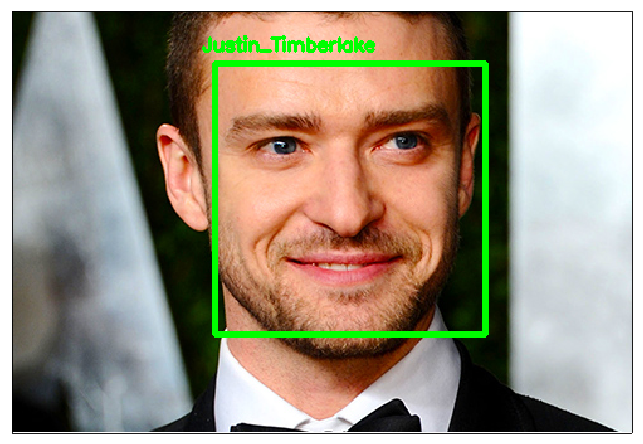

In [70]:
# Using dlib to recognize the face based on cosine simularity

import cv2
import dlib
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from collections import OrderedDict

%matplotlib inline 

IMAGE_PATH = os.path.join("images","faces","Justin_Timberlake.jpg")
FACE_DEC_MODEL_PATH = os.path.join("..","dependencies","shape_predictor_68_face_landmarks.dat")
FACE_REC_MODEL_PATH = os.path.join("..","dependencies","dlib_face_recognition_resnet_model_v1 2.dat")

predictor = dlib.shape_predictor(FACE_DEC_MODEL_PATH)
facerec   = dlib.face_recognition_model_v1(FACE_REC_MODEL_PATH)
detector  = dlib.get_frontal_face_detector()

# define a dictionary that maps the indexes of the facial
# landmarks to specific face regions
FACIAL_LANDMARKS_IDXS = OrderedDict([
    ("mouth", (48, 68)),
    ("right_eyebrow", (17, 22)),
    ("left_eyebrow", (22, 27)),
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48)),
    ("nose", (27, 36)),
    ("jaw", (0, 17))
])

def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)

    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    # return the list of (x, y)-coordinates
    return coords


def draw_bb(image, bound):
    image = image.copy() 
    
    pt1 = ( bound.left(), bound.top())
    pt2 = ( bound.right(), bound.bottom())    
    
    return cv2.rectangle(image, pt1, pt2, (0,255,0), 3)       


detector = dlib.get_frontal_face_detector()

im  = mpimg.imread(IMAGE_PATH) # this is the input image

dets = detector(im)

print("Number of faces detected - {0}".format(len(dets)))

for k, d in enumerate(dets):
        im = draw_bb(im,d)
        
        gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)     
        
        sp = predictor(gray, d)
        
        shape = shape_to_np(sp)
        
        face_descriptor = np.array(facerec.compute_face_descriptor(im, sp))
    
        LABEL = labels[np.argmin(face_distance(features,face_descriptor), axis=0)]
        
        # show the face number
        cv2.putText(im, LABEL, (d.left() - 10, d.top() - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
fig = plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.imshow(im)
plt.xticks([]), plt.yticks([])

plt.show()
